# Phần 1: Giới thiệu về CSDL sử dụng cho đề tài

In [15]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Thiết lập kích thước mặc định cho đồ thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1.1 Tổng quan về CSDL

In [16]:
# Đọc dữ liệu
df = pd.read_csv('global_air_pollution_dataset.csv')

# Hiển thị thông tin cơ bản về dữ liệu
print(f"Số lượng bản ghi (records): {df.shape[0]}")
print(f"Số lượng thuộc tính (fields): {df.shape[1]}")
print("\nXem 5 dòng đầu tiên của dữ liệu:")
display(df.head())

# Mô tả thông tin tổng quan về CSDL
print("\n--- TỔNG QUAN VỀ CƠ SỞ DỮ LIỆU ---")
print("Bộ dữ liệu global_air_pollution_dataset.csv là dữ liệu về chất lượng không khí toàn cầu.")
print("Dữ liệu được thu thập từ các trạm quan trắc khắp thế giới, bao gồm thông tin về:")
print("- Các chỉ số chất lượng không khí (AQI) tổng thể")
print("- Các chỉ số AQI của từng chất ô nhiễm cụ thể như CO, Ozone, NO2, PM2.5")
print("- Phân loại mức độ ô nhiễm theo các tiêu chuẩn quốc tế")

Số lượng bản ghi (records): 23463
Số lượng thuộc tính (fields): 12

Xem 5 dòng đầu tiên của dữ liệu:


Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good


--- TỔNG QUAN VỀ CƠ SỞ DỮ LIỆU ---
Bộ dữ liệu global_air_pollution_dataset.csv là dữ liệu về chất lượng không khí toàn cầu.
Dữ liệu được thu thập từ các trạm quan trắc khắp thế giới, bao gồm thông tin về:
- Các chỉ số chất lượng không khí (AQI) tổng thể
- Các chỉ số AQI của từng chất ô nhiễm cụ thể như CO, Ozone, NO2, PM2.5
- Phân loại mức độ ô nhiễm theo các tiêu chuẩn quốc tế


## 1.2 Giới thiệu từng thuộc tính có trong dữ liệu


In [17]:
# Kiểm tra thông tin về kiểu dữ liệu và giá trị null
print("\n--- THÔNG TIN VỀ KIỂU DỮ LIỆU VÀ GIÁ TRỊ NULL ---")
display(df.info())

# Tạo DataFrame để mô tả chi tiết từng thuộc tính
field_info = []

for column in df.columns:
    # Kiểu dữ liệu
    data_type = df[column].dtype
    
    # Số lượng giá trị null
    null_count = df[column].isnull().sum()
    
    # Số lượng giá trị unique
    unique_count = df[column].nunique()
    
    # Các giá trị thống kê (nếu là dữ liệu số)
    if pd.api.types.is_numeric_dtype(df[column]):
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]
        min_val = df[column].min()
        max_val = df[column].max()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        midrange = (min_val + max_val) / 2
        five_number = f"Min: {min_val}, Q1: {q1}, Median: {median}, Q3: {q3}, Max: {max_val}"
        stats_info = f"Mean: {mean:.2f}, Median: {median}, Mode: {mode}, Min: {min_val}, Max: {max_val}, Midrange: {midrange:.2f}"
    else:
        # Nếu là dữ liệu phân loại/thứ tự, tính tỷ lệ % của các giá trị
        value_counts = df[column].value_counts(normalize=True).to_dict()
        value_percentages = {k: f"{v*100:.2f}%" for k, v in value_counts.items()}
        mode = df[column].mode()[0]
        stats_info = f"Mode: {mode}, Value proportions: {value_percentages if len(value_percentages) <= 5 else list(value_percentages.items())[:5]}"
        five_number = "N/A"
    
    # Thêm thông tin vào danh sách
    field_info.append({
        'Field Name': column,
        'Data Type': data_type,
        'Null Count': null_count,
        'Unique Count': unique_count,
        'Statistical Info': stats_info,
        'Five-Number Summary': five_number
    })

# Tạo DataFrame từ thông tin đã thu thập
field_df = pd.DataFrame(field_info)
display(field_df)

# Mô tả ý nghĩa của từng trường
print("\n--- Ý NGHĨA CỦA TỪNG TRƯỜNG TRONG DỮ LIỆU ---")
field_descriptions = {
    'Country': 'Tên quốc gia nơi tiến hành đo chất lượng không khí',
    'City': 'Tên thành phố/khu vực nơi tiến hành đo chất lượng không khí',
    'AQI Value': 'Giá trị chỉ số chất lượng không khí tổng thể (Air Quality Index)',
    'AQI Category': 'Phân loại mức độ ô nhiễm dựa trên AQI tổng thể (Good, Moderate, Unhealthy, etc.)',
    'CO AQI Value': 'Giá trị chỉ số chất lượng không khí đối với khí CO (Carbon Monoxide)',
    'CO AQI Category': 'Phân loại mức độ ô nhiễm dựa trên chỉ số CO',
    'Ozone AQI Value': 'Giá trị chỉ số chất lượng không khí đối với Ozone',
    'Ozone AQI Category': 'Phân loại mức độ ô nhiễm dựa trên chỉ số Ozone',
    'NO2 AQI Value': 'Giá trị chỉ số chất lượng không khí đối với khí NO2 (Nitrogen Dioxide)',
    'NO2 AQI Category': 'Phân loại mức độ ô nhiễm dựa trên chỉ số NO2',
    'PM2.5 AQI Value': 'Giá trị chỉ số chất lượng không khí đối với bụi mịn PM2.5',
    'PM2.5 AQI Category': 'Phân loại mức độ ô nhiễm dựa trên chỉ số PM2.5'
}

for field, description in field_descriptions.items():
    print(f"{field}: {description}")


--- THÔNG TIN VỀ KIỂU DỮ LIỆU VÀ GIÁ TRỊ NULL ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


None

Field Name Data Type  Null Count  Unique Count  \
0              Country    object         427           175   
1                 City    object           1         23462   
2            AQI Value     int64           0           347   
3         AQI Category    object           0             6   
4         CO AQI Value     int64           0            34   
5      CO AQI Category    object           0             3   
6      Ozone AQI Value     int64           0           213   
7   Ozone AQI Category    object           0             5   
8        NO2 AQI Value     int64           0            59   
9     NO2 AQI Category    object           0             2   
10     PM2.5 AQI Value     int64           0           383   
11  PM2.5 AQI Category    object           0             6   

                                     Statistical Info  \
0   Mode: United States of America, Value proporti...   
1   Mode: A Coruna, Value proportions: [('Praskove...   
2   Mean: 72.01, Median: 55.0, Mode: 50, Min: 6, M...   
3   Mode: Good, Value proportions: [('Good', '42.3...   
4   Mean: 1.37, Median: 1.0, Mode: 1, Min: 0, Max:...   
5   Mode: Good, Value proportions: {'Good': '99.99...   
6   Mean: 35.19, Median: 31.0, Mode: 30, Min: 0, M...   
7   Mode: Good, Value proportions: {'Good': '89.80...   
8   Mean: 3.06, Median: 1.0, Mode: 0, Min: 0, Max:...   
9   Mode: Good, Value proportions: {'Good': '99.94...   
10  Mean: 68.52, Median: 54.0, Mode: 50, Min: 0, M...   
11  Mode: Good, Value proportions: [('Good', '43.5...   

                                  Five-Number Summary  
0                                                 N/A  
1                                                 N/A  
2   Min: 6, Q1: 39.0, Median: 55.0, Q3: 79.0, Max:...  
3                                                 N/A  
4     Min: 0, Q1: 1.0, Median: 1.0, Q3: 1.0, Max: 133  
5                                                 N/A  
6   Min: 0, Q1: 21.0, Median: 31.0, Q3: 40.0, Max:...  
7                                                 N/A  
8      Min: 0, Q1: 0.0, Median: 1.0, Q3: 4.0, Max: 91  
9                                                 N/A  
10  Min: 0, Q1: 35.0, Median: 54.0, Q3: 79.0, Max:...  
11                                                N/A


--- Ý NGHĨA CỦA TỪNG TRƯỜNG TRONG DỮ LIỆU ---
Country: Tên quốc gia nơi tiến hành đo chất lượng không khí
City: Tên thành phố/khu vực nơi tiến hành đo chất lượng không khí
AQI Value: Giá trị chỉ số chất lượng không khí tổng thể (Air Quality Index)
AQI Category: Phân loại mức độ ô nhiễm dựa trên AQI tổng thể (Good, Moderate, Unhealthy, etc.)
CO AQI Value: Giá trị chỉ số chất lượng không khí đối với khí CO (Carbon Monoxide)
CO AQI Category: Phân loại mức độ ô nhiễm dựa trên chỉ số CO
Ozone AQI Value: Giá trị chỉ số chất lượng không khí đối với Ozone
Ozone AQI Category: Phân loại mức độ ô nhiễm dựa trên chỉ số Ozone
NO2 AQI Value: Giá trị chỉ số chất lượng không khí đối với khí NO2 (Nitrogen Dioxide)
NO2 AQI Category: Phân loại mức độ ô nhiễm dựa trên chỉ số NO2
PM2.5 AQI Value: Giá trị chỉ số chất lượng không khí đối với bụi mịn PM2.5
PM2.5 AQI Category: Phân loại mức độ ô nhiễm dựa trên chỉ số PM2.5


## 1.3. Tiền xử lý dữ liệu


In [18]:
# Kiểm tra giá trị trùng lặp
print(f"\nSố lượng bản ghi trùng lặp: {df.duplicated().sum()}")

# Loại bỏ các bản ghi trùng lặp (nếu có)
df_clean = df.drop_duplicates().reset_index(drop=True)
print(f"Số lượng bản ghi sau khi loại bỏ trùng lặp: {df_clean.shape[0]}")

# Kiểm tra và xử lý missing data
print("\nKiểm tra missing data:")
display(df_clean.isnull().sum())

# Nếu có missing data, tiến hành xử lý (điền giá trị hoặc loại bỏ)
# Ví dụ: điền giá trị trung bình cho các cột số
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Ví dụ: điền giá trị phổ biến nhất cho các cột phân loại
for col in df_clean.select_dtypes(include=['object']).columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Kiểm tra dữ liệu sau khi xử lý
print("\nKiểm tra missing data sau khi xử lý:")
display(df_clean.isnull().sum())

# Phân tích sự nhất quán của dữ liệu và điều chỉnh nếu cần
# Ví dụ: chuẩn hóa tên quốc gia hoặc thành phố
print("\nSố lượng quốc gia duy nhất trong dữ liệu:", df_clean['Country'].nunique())
print("Số lượng thành phố duy nhất trong dữ liệu:", df_clean['City'].nunique())

# Kiểm tra và điều chỉnh kiểu dữ liệu nếu cần
# Chuyển đổi kiểu dữ liệu cho các cột AQI Value thành số nếu chưa phải
numeric_cols = [col for col in df_clean.columns if 'Value' in col]
for col in numeric_cols:
    if not pd.api.types.is_numeric_dtype(df_clean[col]):
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Lưu dữ liệu đã tiền xử lý
df_clean.to_csv('air_pollution_preprocessed.csv', index=False)
print("\nĐã lưu dữ liệu đã tiền xử lý vào file 'air_pollution_preprocessed.csv'")


Số lượng bản ghi trùng lặp: 0
Số lượng bản ghi sau khi loại bỏ trùng lặp: 23463

Kiểm tra missing data:


Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


Kiểm tra missing data sau khi xử lý:


Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


Số lượng quốc gia duy nhất trong dữ liệu: 175
Số lượng thành phố duy nhất trong dữ liệu: 23462

Đã lưu dữ liệu đã tiền xử lý vào file 'air_pollution_preprocessed.csv'


# Phần 2: Phân tích - thống kê thủ công


## 2.1 Tìm hiểu dữ liệu
### 2.1.1 Vẽ các đồ thị cho từng thuộc tính

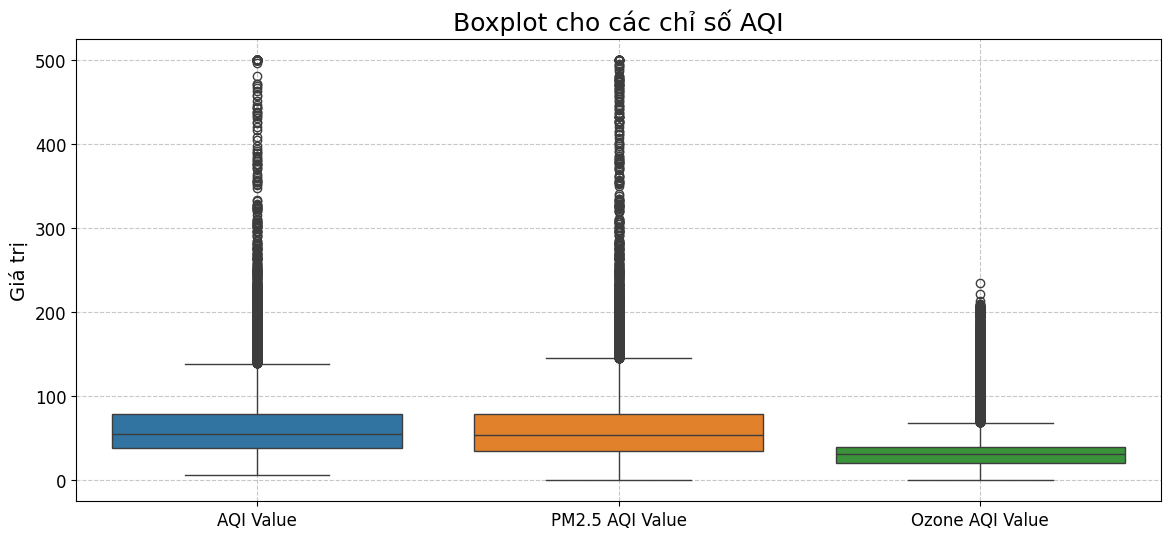

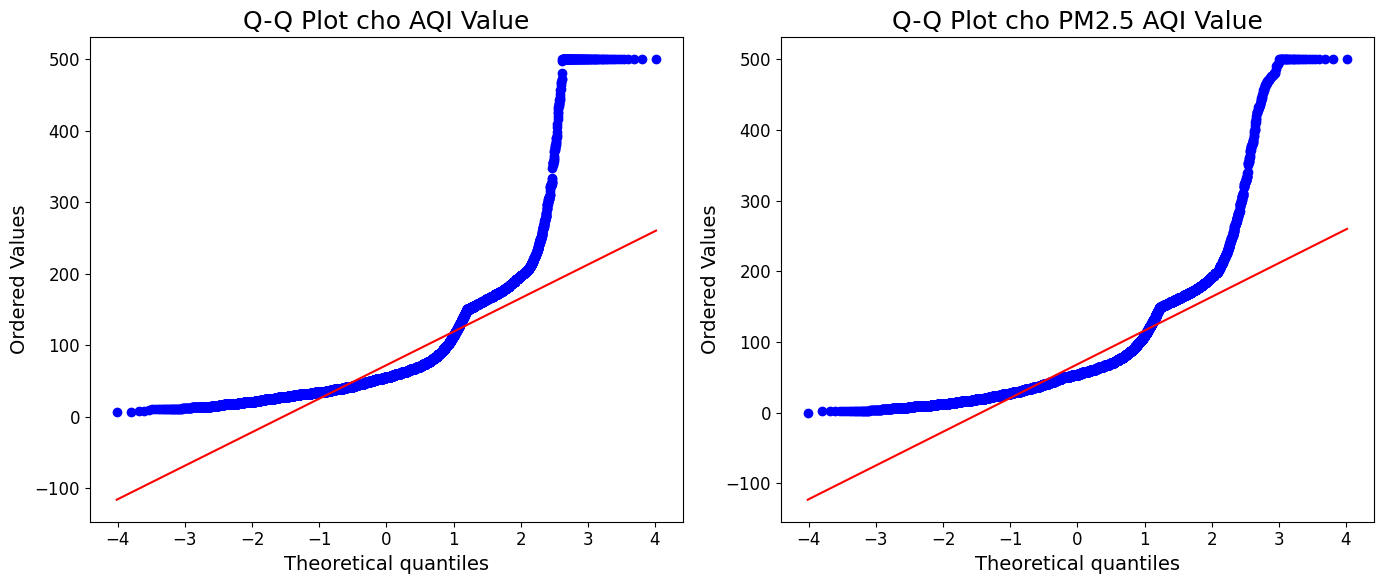

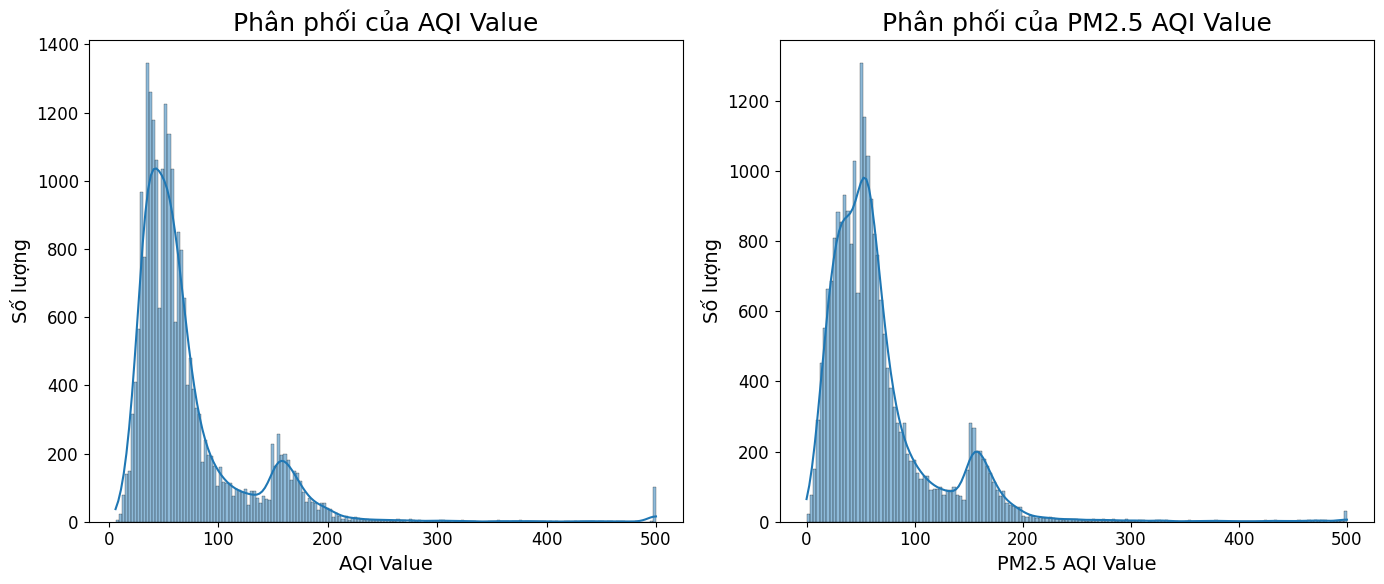

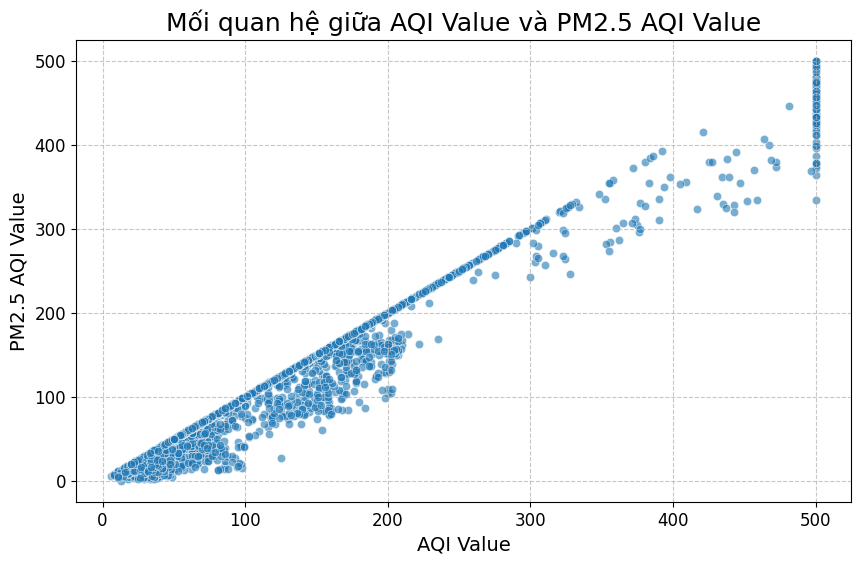

In [19]:
# Chọn 3 thuộc tính quan trọng để phân tích
features = ['AQI Value', 'PM2.5 AQI Value', 'Ozone AQI Value']

# 1. Boxplot dựa trên five-number summary
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[features])
plt.title('Boxplot cho các chỉ số AQI')
plt.ylabel('Giá trị')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Sử dụng Plotly để tạo boxplot tương tác
fig = go.Figure()
for col in features:
    fig.add_trace(go.Box(y=df_clean[col], name=col))
fig.update_layout(title='Boxplot tương tác cho các chỉ số AQI',
                  yaxis_title='Giá trị',
                  boxmode='group')
fig.show()

# 2. Quantile-Quantile Plot cho 2 thuộc tính
plt.figure(figsize=(14, 6))

# Q-Q plot cho AQI Value và PM2.5 AQI Value
plt.subplot(1, 2, 1)
stats.probplot(df_clean['AQI Value'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot cho AQI Value')

# Q-Q plot cho AQI Value và Ozone AQI Value
plt.subplot(1, 2, 2)
stats.probplot(df_clean['PM2.5 AQI Value'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot cho PM2.5 AQI Value')

plt.tight_layout()
plt.show()

# 3. Histogram cho 2 thuộc tính có liên quan
plt.figure(figsize=(14, 6))

# Histogram cho AQI Value
plt.subplot(1, 2, 1)
sns.histplot(df_clean['AQI Value'], kde=True)
plt.title('Phân phối của AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('Số lượng')

# Histogram cho PM2.5 AQI Value
plt.subplot(1, 2, 2)
sns.histplot(df_clean['PM2.5 AQI Value'], kde=True)
plt.title('Phân phối của PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

# Sử dụng Plotly để tạo histograms tương tác
fig = make_subplots(rows=1, cols=2, subplot_titles=('Phân phối của AQI Value', 'Phân phối của PM2.5 AQI Value'))

fig.add_trace(go.Histogram(x=df_clean['AQI Value'], nbinsx=30, name='AQI Value'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_clean['PM2.5 AQI Value'], nbinsx=30, name='PM2.5 AQI Value'), row=1, col=2)

fig.update_layout(title_text='Phân phối các chỉ số AQI', showlegend=False)
fig.show()

# 4. Scatter plot cho 2 thuộc tính có liên quan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AQI Value', y='PM2.5 AQI Value', data=df_clean, alpha=0.6)
plt.title('Mối quan hệ giữa AQI Value và PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Sử dụng Plotly để tạo scatter plot tương tác
fig = px.scatter(df_clean, x='AQI Value', y='PM2.5 AQI Value', 
                 color='AQI Category', hover_data=['Country', 'City'],
                 title='Mối quan hệ giữa AQI Value và PM2.5 AQI Value theo phân loại AQI')
fig.show()

### 2.1.2 Nhóm dữ liệu theo thuộc tính danh nghĩa và phân tích


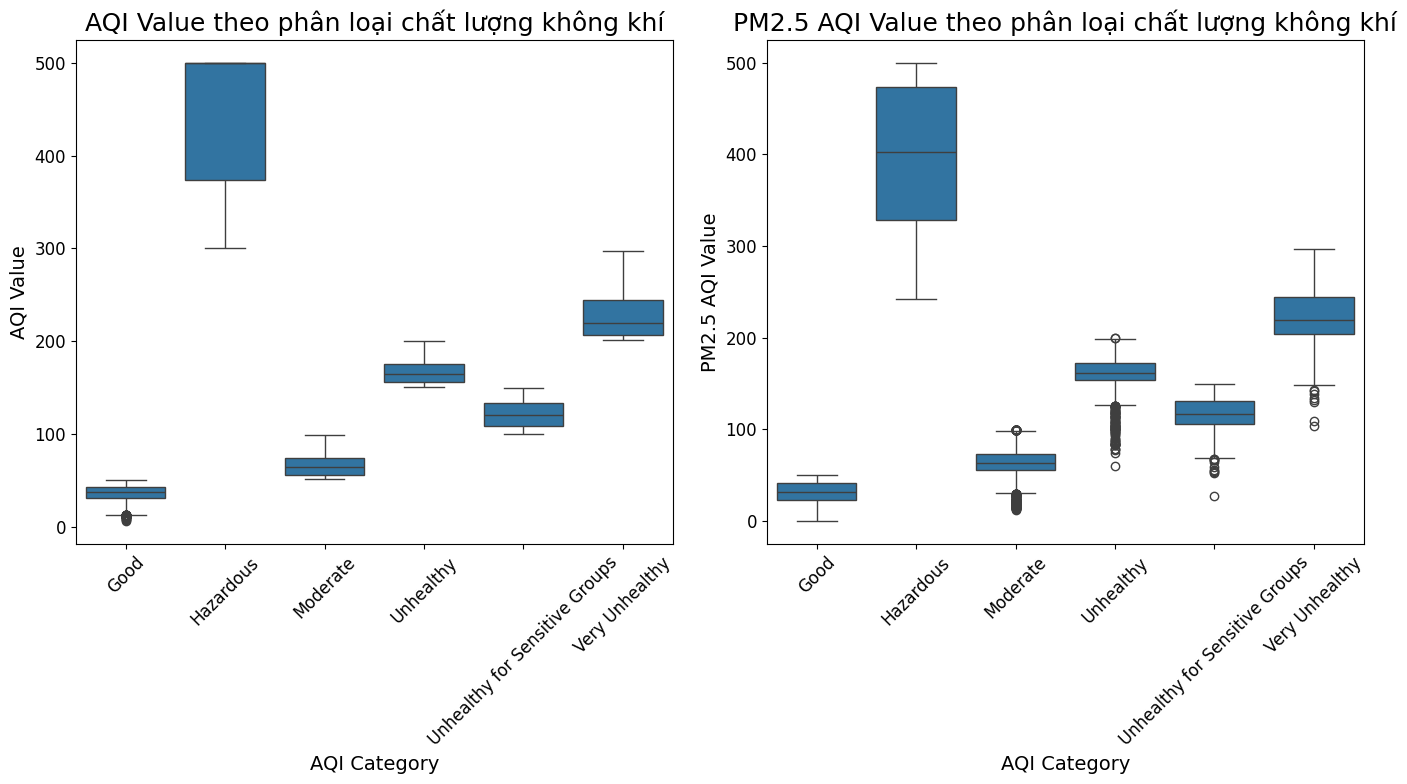

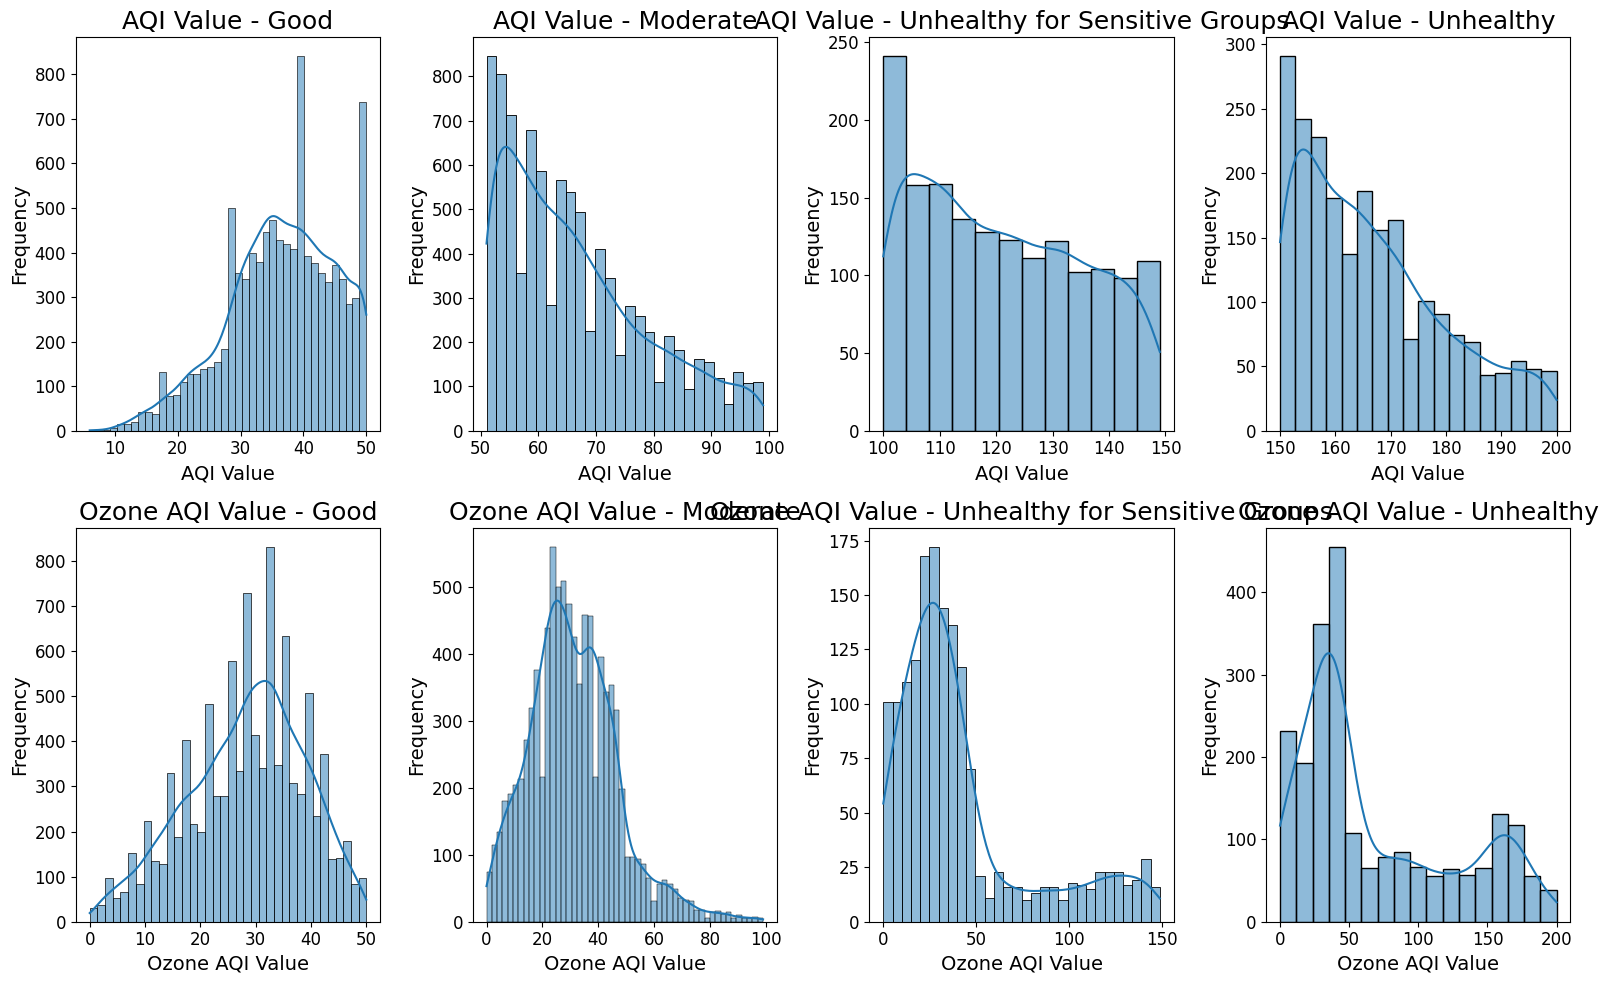

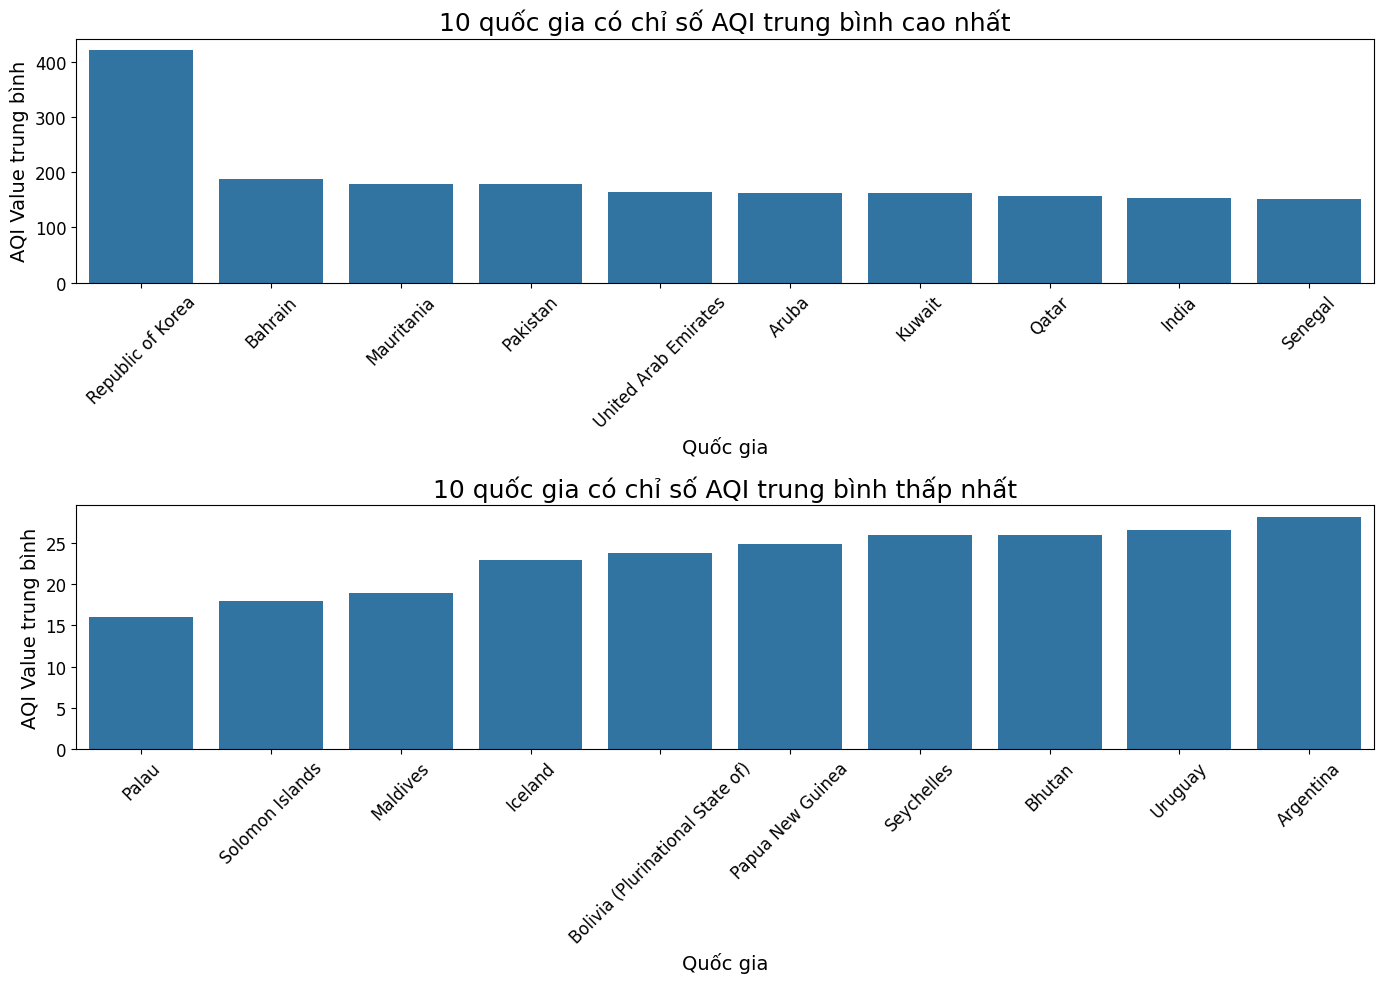

In [20]:
# Nhóm dữ liệu theo phân loại chất lượng không khí (AQI Category)
# Phân tích sự khác biệt về các chỉ số AQI giữa các nhóm

# 1. Boxplot theo nhóm phân loại AQI
plt.figure(figsize=(14, 8))

# Boxplot cho AQI Value theo AQI Category
plt.subplot(1, 2, 1)
sns.boxplot(x='AQI Category', y='AQI Value', data=df_clean, order=sorted(df_clean['AQI Category'].unique()))
plt.title('AQI Value theo phân loại chất lượng không khí')
plt.xticks(rotation=45)
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')

# Boxplot cho PM2.5 AQI Value theo AQI Category
plt.subplot(1, 2, 2)
sns.boxplot(x='AQI Category', y='PM2.5 AQI Value', data=df_clean, order=sorted(df_clean['AQI Category'].unique()))
plt.title('PM2.5 AQI Value theo phân loại chất lượng không khí')
plt.xticks(rotation=45)
plt.xlabel('AQI Category')
plt.ylabel('PM2.5 AQI Value')

plt.tight_layout()
plt.show()

# 2. Histogram theo nhóm phân loại AQI
# Chọn 2 thuộc tính để phân tích
feature1 = 'AQI Value'
feature2 = 'Ozone AQI Value'

# Lọc dữ liệu theo các phân loại phổ biến để biểu đồ rõ ràng hơn
categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']
filtered_df = df_clean[df_clean['AQI Category'].isin(categories)]

# Tạo histogram cho AQI Value theo từng phân loại
plt.figure(figsize=(16, 10))

# Histograms cho feature 1
for i, category in enumerate(categories, 1):
    category_data = filtered_df[filtered_df['AQI Category'] == category]
    
    plt.subplot(2, len(categories), i)
    sns.histplot(category_data[feature1], kde=True)
    plt.title(f'{feature1} - {category}')
    plt.xlabel(feature1)
    plt.ylabel('Frequency')

# Histograms cho feature 2
for i, category in enumerate(categories, 1):
    category_data = filtered_df[filtered_df['AQI Category'] == category]
    
    plt.subplot(2, len(categories), i + len(categories))
    sns.histplot(category_data[feature2], kde=True)
    plt.title(f'{feature2} - {category}')
    plt.xlabel(feature2)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Phân tích trung bình của các chỉ số theo quốc gia
# Nhóm dữ liệu theo quốc gia và tính trung bình các chỉ số AQI
country_avg = df_clean.groupby('Country')[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().reset_index()

# Sắp xếp theo AQI Value trung bình
top_10_polluted = country_avg.sort_values('AQI Value', ascending=False).head(10)
top_10_cleanest = country_avg.sort_values('AQI Value', ascending=True).head(10)

# Vẽ biểu đồ so sánh 10 quốc gia ô nhiễm nhất và 10 quốc gia sạch nhất
plt.figure(figsize=(14, 10))

# Top 10 quốc gia ô nhiễm nhất
plt.subplot(2, 1, 1)
sns.barplot(x='Country', y='AQI Value', data=top_10_polluted)
plt.title('10 quốc gia có chỉ số AQI trung bình cao nhất')
plt.xticks(rotation=45)
plt.xlabel('Quốc gia')
plt.ylabel('AQI Value trung bình')

# Top 10 quốc gia sạch nhất
plt.subplot(2, 1, 2)
sns.barplot(x='Country', y='AQI Value', data=top_10_cleanest)
plt.title('10 quốc gia có chỉ số AQI trung bình thấp nhất')
plt.xticks(rotation=45)
plt.xlabel('Quốc gia')
plt.ylabel('AQI Value trung bình')

plt.tight_layout()
plt.show()

# 4. Sử dụng Plotly để tạo biểu đồ tương tác cho phân tích theo quốc gia
# Biểu đồ radar cho 5 quốc gia ô nhiễm nhất
top_5_countries = top_10_polluted.head(5)['Country'].tolist()
radar_df = df_clean[df_clean['Country'].isin(top_5_countries)].groupby('Country')[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().reset_index()

# Tạo biểu đồ radar
fig = go.Figure()

categories = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

for i in range(len(radar_df)):
    fig.add_trace(go.Scatterpolar(
        r=radar_df.iloc[i][categories].values.tolist(),
        theta=categories,
        fill='toself',
        name=radar_df.iloc[i]['Country']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )
    ),
    showlegend=True,
    title='So sánh các chỉ số ô nhiễm không khí giữa 5 quốc gia ô nhiễm nhất'
)

fig.show()

### 2.1.3 Đo lường sự tương đồng và khác biệt của dữ liệu


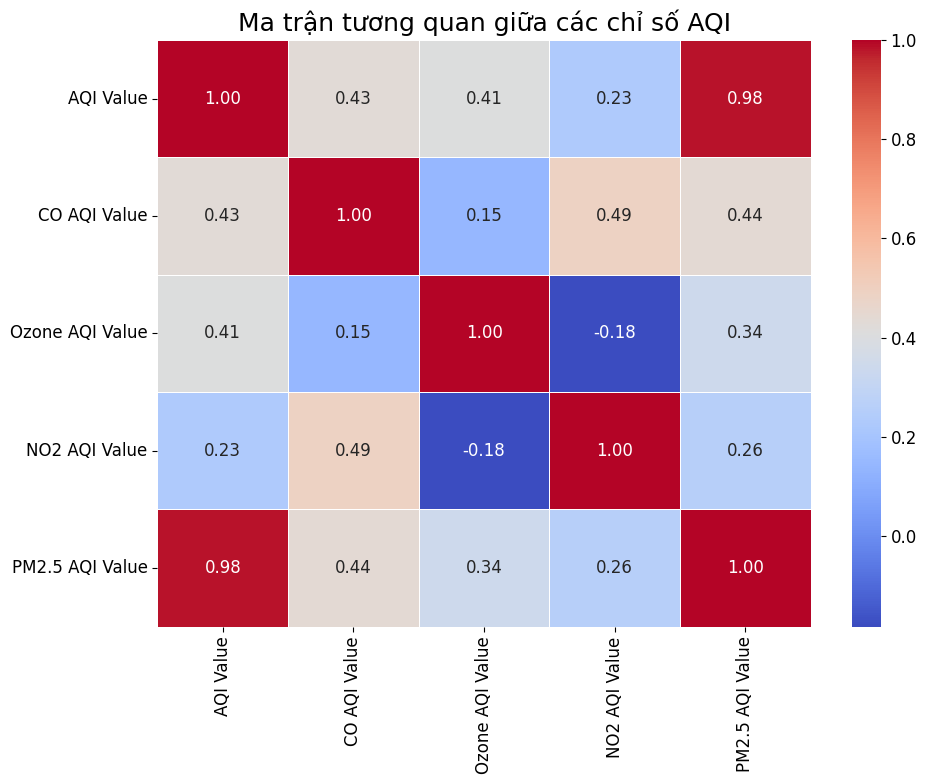

Ma trận độ tương đồng Cosine giữa 4 bản ghi đầu tiên:


Record 1  Record 2  Record 3  Record 4
Record 1  1.000000  0.929664  0.997547  0.947602
Record 2  0.929664  1.000000  0.952400  0.786552
Record 3  0.997547  0.952400  1.000000  0.928037
Record 4  0.947602  0.786552  0.928037  1.000000

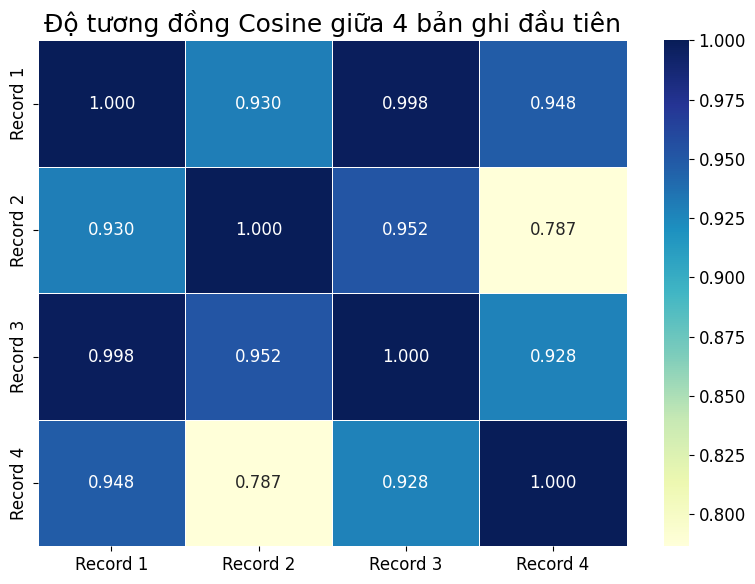


Ma trận độ tương đồng Cosine giữa các quốc gia:


United States of America     China     India  \
United States of America                  1.000000  0.986858  0.993547   
China                                     0.986858  1.000000  0.972223   
India                                     0.993547  0.972223  1.000000   
France                                    0.996801  0.994992  0.990123   
Japan                                     0.974709  0.997533  0.954571   

                            France     Japan  
United States of America  0.996801  0.974709  
China                     0.994992  0.997533  
India                     0.990123  0.954571  
France                    1.000000  0.985656  
Japan                     0.985656  1.000000

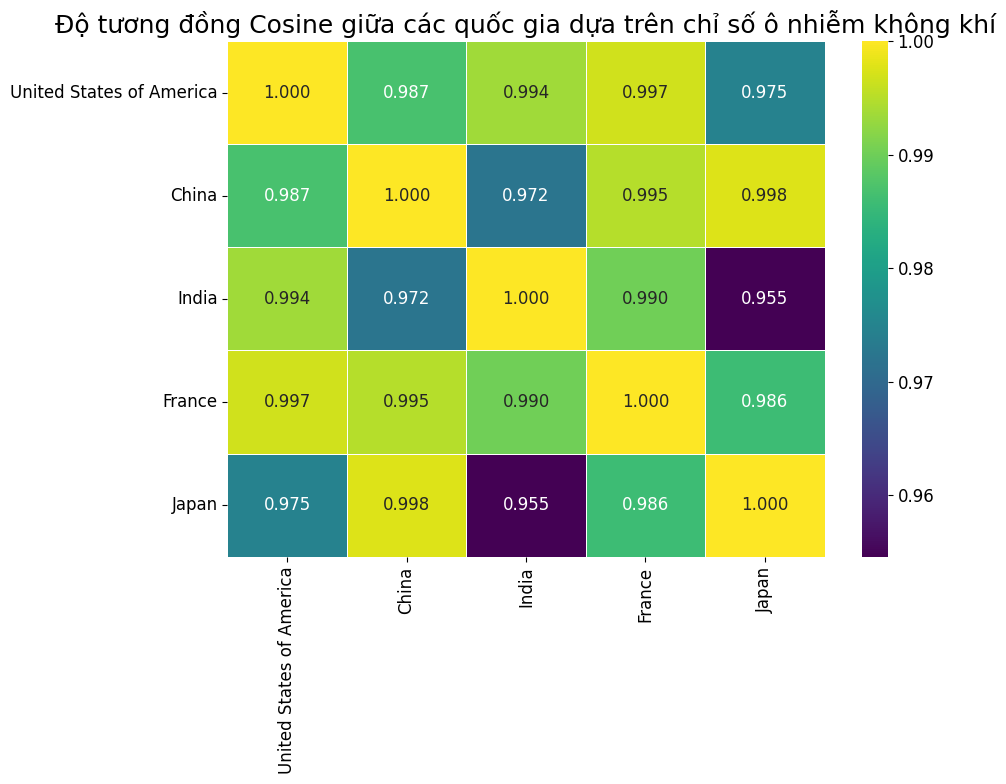

In [21]:
# Chọn các thuộc tính thuộc các dạng dữ liệu khác nhau
# - Thuộc tính danh nghĩa: Country, AQI Category
# - Thuộc tính nhị phân: Có thể chuyển đổi AQI Category thành nhị phân (Good/Not Good)
# - Thuộc tính số: AQI Value, PM2.5 AQI Value
# - Thuộc tính thứ tự: AQI Category (có thể xem như thứ tự từ Good -> Hazardous)

# Tạo thuộc tính nhị phân từ AQI Category
df_clean['AQI_Binary'] = df_clean['AQI Category'].apply(lambda x: 1 if x == 'Good' else 0)

# 1. Tính ma trận tương quan giữa các thuộc tính số
numeric_features = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
correlation_matrix = df_clean[numeric_features].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan giữa các chỉ số AQI')
plt.tight_layout()
plt.show()

# 2. Tính độ đo Cosine
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Chọn 4 dòng dữ liệu đầu tiên để phân tích
sample_data = df_clean[numeric_features].head(4).values

# Tính ma trận cosine similarity
cosine_sim_matrix = cosine_similarity(sample_data)

# Tạo DataFrame hiển thị kết quả
cosine_df = pd.DataFrame(cosine_sim_matrix, 
                          index=['Record 1', 'Record 2', 'Record 3', 'Record 4'],
                          columns=['Record 1', 'Record 2', 'Record 3', 'Record 4'])

print("Ma trận độ tương đồng Cosine giữa 4 bản ghi đầu tiên:")
display(cosine_df)

# Vẽ heatmap hiển thị độ tương đồng cosine
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_df, annot=True, fmt='.3f', cmap='YlGnBu', linewidths=0.5)
plt.title('Độ tương đồng Cosine giữa 4 bản ghi đầu tiên')
plt.tight_layout()
plt.show()

# 3. So sánh độ tương đồng giữa các quốc gia
# Tính giá trị trung bình của các chỉ số theo quốc gia
country_profiles = df_clean.groupby('Country')[numeric_features].mean()

# Chọn một số quốc gia để phân tích
countries_to_compare = ['United States of America', 'China', 'India', 'France', 'Japan']
selected_countries = country_profiles.loc[countries_to_compare]

# Tính ma trận tương đồng cosine giữa các quốc gia
country_cosine = cosine_similarity(selected_countries.values)

# Tạo DataFrame để hiển thị kết quả
country_sim_df = pd.DataFrame(country_cosine, 
                               index=countries_to_compare, 
                               columns=countries_to_compare)

print("\nMa trận độ tương đồng Cosine giữa các quốc gia:")
display(country_sim_df)

# Vẽ heatmap hiển thị độ tương đồng giữa các quốc gia
plt.figure(figsize=(10, 8))
sns.heatmap(country_sim_df, annot=True, fmt='.3f', cmap='viridis', linewidths=0.5)
plt.title('Độ tương đồng Cosine giữa các quốc gia dựa trên chỉ số ô nhiễm không khí')
plt.tight_layout()
plt.show()

## 2.2 Tiền xử lý dữ liệu


Số lượng outliers trong AQI Value: 2935
Số lượng outliers trong CO AQI Value: 8596
Số lượng outliers trong Ozone AQI Value: 1513
Số lượng outliers trong NO2 AQI Value: 1681
Số lượng outliers trong PM2.5 AQI Value: 2641


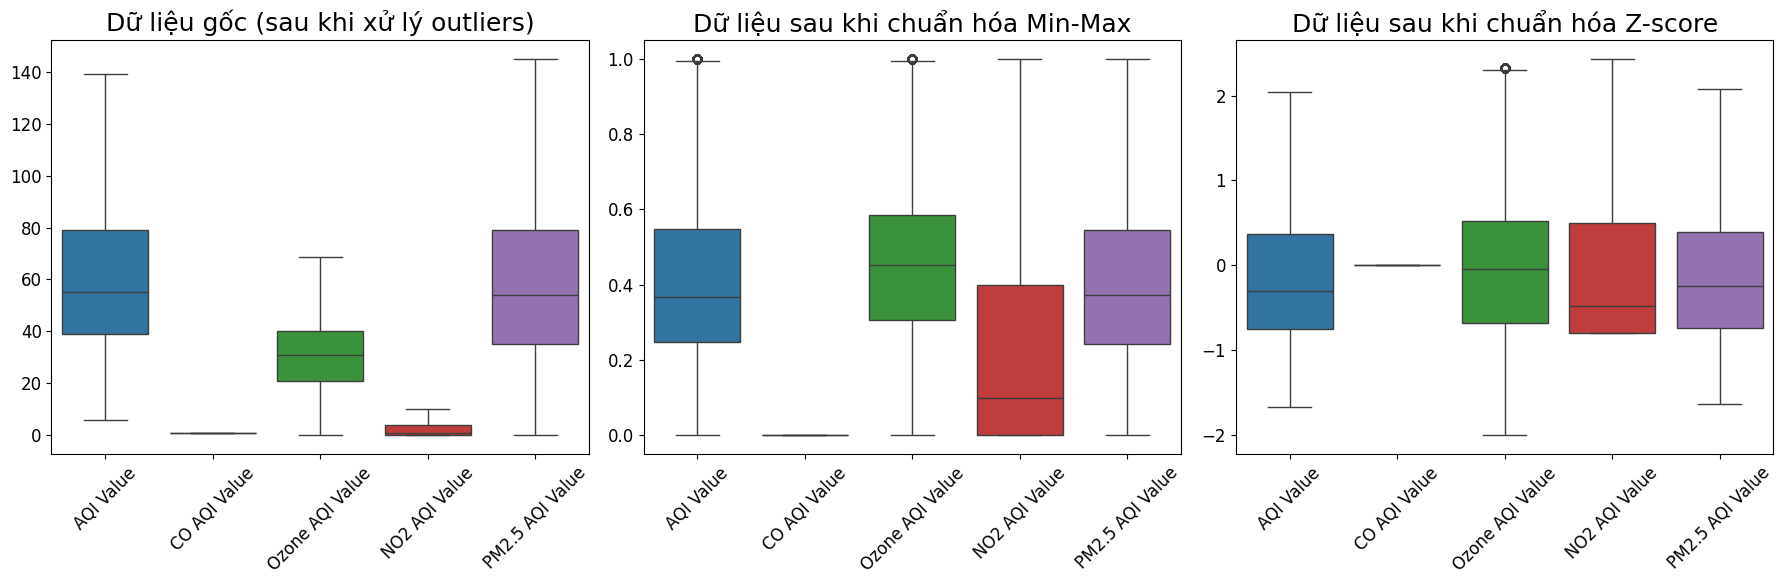


Kích thước dữ liệu sau khi mã hóa: (23463, 25)
Các cột sau khi mã hóa:
['Country', 'City', 'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'AQI_Binary', 'AQI Category_Hazardous', 'AQI Category_Moderate', 'AQI Category_Unhealthy', 'AQI Category_Unhealthy for Sensitive Groups', 'AQI Category_Very Unhealthy', 'CO AQI Category_Moderate', 'CO AQI Category_Unhealthy for Sensitive Groups', 'Ozone AQI Category_Moderate', 'Ozone AQI Category_Unhealthy', 'Ozone AQI Category_Unhealthy for Sensitive Groups', 'Ozone AQI Category_Very Unhealthy', 'NO2 AQI Category_Moderate', 'PM2.5 AQI Category_Hazardous', 'PM2.5 AQI Category_Moderate', 'PM2.5 AQI Category_Unhealthy', 'PM2.5 AQI Category_Unhealthy for Sensitive Groups', 'PM2.5 AQI Category_Very Unhealthy']

Đã lưu dữ liệu đã mã hóa vào file 'air_pollution_preprocessed_encoded.csv'


In [22]:
# 1. Phát hiện và xử lý outliers
def detect_and_handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Số lượng outliers trong {column}: {len(outliers)}")
    
    # Có thể chọn một trong các cách xử lý outliers sau:
    # 1. Loại bỏ outliers
    # df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # 2. Thay thế outliers bằng giá trị lower_bound hoặc upper_bound
    df_handled = df.copy()
    df_handled.loc[df_handled[column] < lower_bound, column] = lower_bound
    df_handled.loc[df_handled[column] > upper_bound, column] = upper_bound
    
    return df_handled, outliers

# Xử lý outliers cho từng thuộc tính số
df_processed = df_clean.copy()
for col in numeric_features:
    df_processed, _ = detect_and_handle_outliers(df_processed, col)

# 2. Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Phương pháp chuẩn hóa Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
df_normalized = df_processed.copy()
df_normalized[numeric_features] = min_max_scaler.fit_transform(df_processed[numeric_features])

# Phương pháp chuẩn hóa Z-score (Standardization)
standard_scaler = StandardScaler()
df_standardized = df_processed.copy()
df_standardized[numeric_features] = standard_scaler.fit_transform(df_processed[numeric_features])

# So sánh dữ liệu trước và sau khi chuẩn hóa
plt.figure(figsize=(18, 6))

# Dữ liệu gốc
plt.subplot(1, 3, 1)
sns.boxplot(data=df_processed[numeric_features])
plt.title('Dữ liệu gốc (sau khi xử lý outliers)')
plt.xticks(rotation=45)
plt.tight_layout()

# Dữ liệu sau khi chuẩn hóa Min-Max
plt.subplot(1, 3, 2)
sns.boxplot(data=df_normalized[numeric_features])
plt.title('Dữ liệu sau khi chuẩn hóa Min-Max')
plt.xticks(rotation=45)
plt.tight_layout()

# Dữ liệu sau khi chuẩn hóa Z-score
plt.subplot(1, 3, 3)
sns.boxplot(data=df_standardized[numeric_features])
plt.title('Dữ liệu sau khi chuẩn hóa Z-score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3. Mã hóa biến phân loại (Categorical Variables)
# One-Hot Encoding
df_encoded = df_processed.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'], drop_first=True)

# Hiển thị kết quả sau khi mã hóa
print("\nKích thước dữ liệu sau khi mã hóa:", df_encoded.shape)
print("Các cột sau khi mã hóa:")
print(df_encoded.columns.tolist())

# Lưu dữ liệu đã xử lý
df_encoded.to_csv('air_pollution_preprocessed_encoded.csv', index=False)
print("\nĐã lưu dữ liệu đã mã hóa vào file 'air_pollution_preprocessed_encoded.csv'")

## 2.3 Tổng hợp dữ liệu


Thống kê theo quốc gia (5 quốc gia đầu tiên):


Country  AQI Value                            CO AQI Value             \
                     mean median min  max        std         mean median min   
0  Afghanistan  95.959184   87.0  49  198  32.863328     0.591837    1.0   0   
1      Albania  68.250000   66.0  44  115  17.448542     1.000000    1.0   1   
2      Algeria  88.166667   82.5  36  164  45.626614     1.916667    1.0   0   
3      Andorra  29.333333   29.0  27   32   2.516611     0.666667    1.0   0   
4       Angola  83.925926   58.0  20  285  64.583831     3.148148    1.0   0   

       ... NO2 AQI Value                           PM2.5 AQI Value             \
  max  ...          mean median min max        std            mean median min   
0   2  ...      0.020408    0.0   0   1   0.142857       95.918367   87.0  47   
1   1  ...      0.718750    1.0   0   2   0.728869       68.093750   66.0  39   
2  10  ...      9.333333    1.0   0  69  19.809701       80.250000   72.0   5   
3   1  ...      0.000000    0.0   0   0   0.000000       22.000000   22.0  20   
4  23  ...      1.888889    0.0   0  14   3.630356       81.925926   58.0   8   

                   
   max        std  
0  198  32.924052  
1  115  17.693373  
2  164  49.405787  
3   24   2.000000  
4  285  66.465680  

[5 rows x 26 columns]


Thống kê theo mức độ ô nhiễm:


AQI Category   AQI Value  CO AQI Value  Ozone AQI Value  \
0                            Good   36.480978      0.772444        28.287138   
1                       Hazardous  440.937173      3.743455        58.486911   
2                        Moderate   66.454664      1.292493        31.295418   
3                       Unhealthy  166.712618      3.090256        68.986529   
4  Unhealthy for Sensitive Groups  121.135135      2.137649        41.867379   
5                  Very Unhealthy  228.080139      5.233449        84.968641   

   NO2 AQI Value  PM2.5 AQI Value  
0       1.476651        31.599738  
1       3.759162       400.204188  
2       3.636659        65.433647  
3       5.436462       162.685676  
4       5.362665       118.254557  
5       7.930314       218.825784

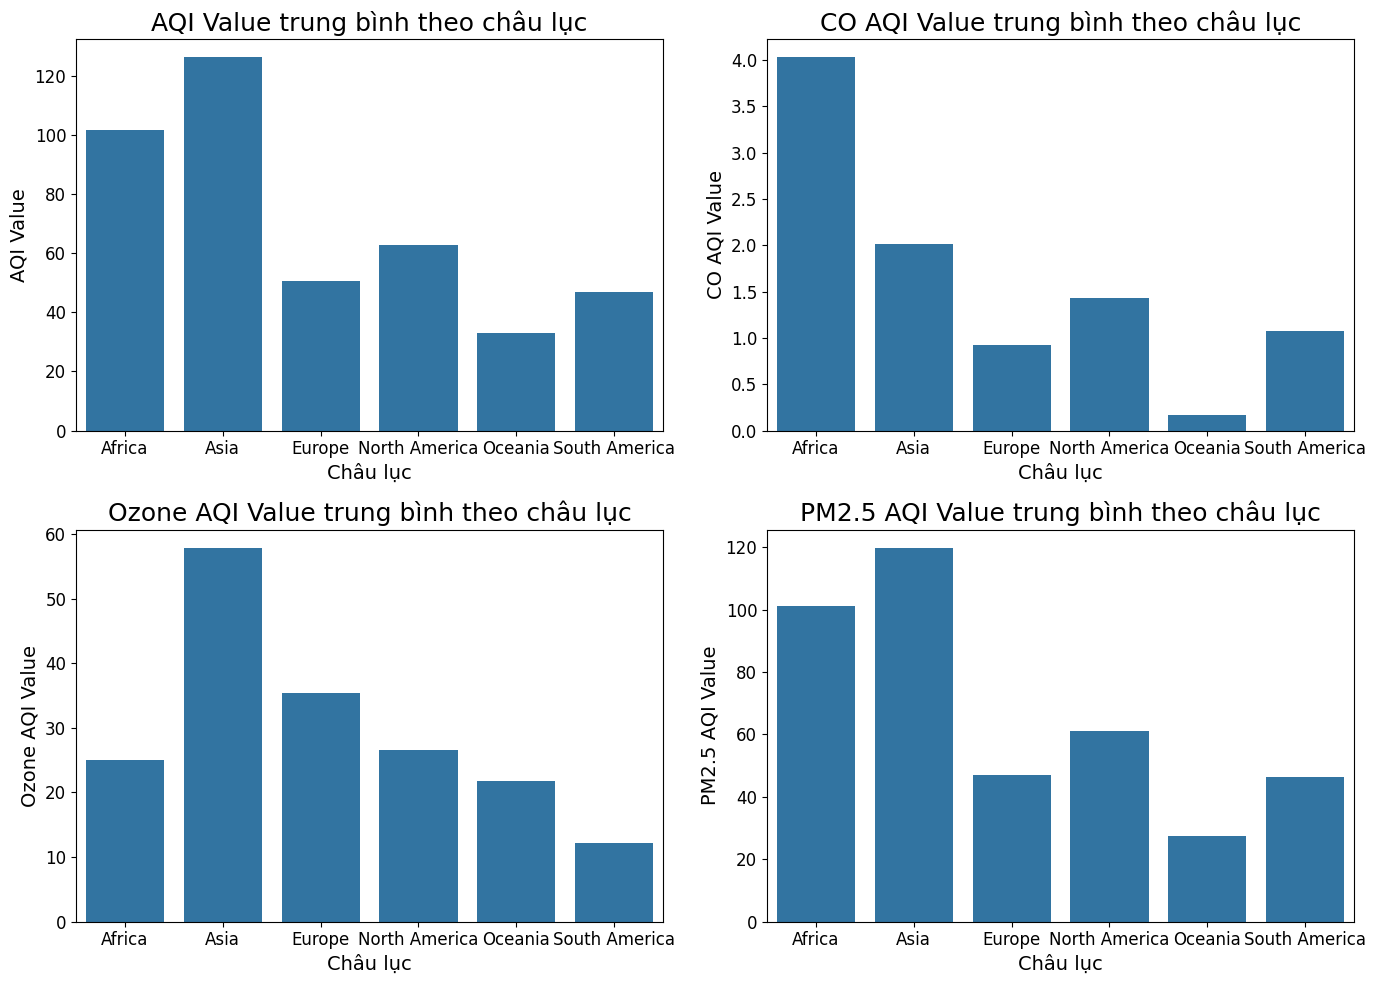

In [23]:
# 1. Tính toán thống kê mô tả theo quốc gia
country_stats = df_clean.groupby('Country')[numeric_features].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

# Hiển thị kết quả cho 5 quốc gia đầu tiên
print("Thống kê theo quốc gia (5 quốc gia đầu tiên):")
display(country_stats.head())

# 2. Phân nhóm dữ liệu theo mức độ ô nhiễm không khí
pollution_levels = df_clean.groupby('AQI Category')[numeric_features].mean().reset_index()

# Hiển thị thống kê theo mức độ ô nhiễm
print("\nThống kê theo mức độ ô nhiễm:")
display(pollution_levels)

# 3. Vẽ biểu đồ so sánh mức độ ô nhiễm không khí theo châu lục
# Tạo map để gán quốc gia vào châu lục (đơn giản hóa, chỉ lấy một số quốc gia làm ví dụ)
continent_map = {
    'United States of America': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Brazil': 'South America', 'Colombia': 'South America', 'Argentina': 'South America',
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'Indonesia': 'Asia', 'Viet Nam': 'Asia',
    'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Spain': 'Europe',
    'Egypt': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa', 'Kenya': 'Africa',
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}

# Thêm cột châu lục vào dataframe
df_with_continent = df_clean.copy()
df_with_continent['Continent'] = df_with_continent['Country'].map(continent_map)

# Loại bỏ các quốc gia không được gán châu lục
df_with_continent = df_with_continent.dropna(subset=['Continent'])

# Tính trung bình chỉ số AQI theo châu lục
continent_aqi = df_with_continent.groupby('Continent')[numeric_features].mean().reset_index()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 10))

# AQI Value
plt.subplot(2, 2, 1)
sns.barplot(x='Continent', y='AQI Value', data=continent_aqi)
plt.title('AQI Value trung bình theo châu lục')
plt.xlabel('Châu lục')
plt.ylabel('AQI Value')

# CO AQI Value
plt.subplot(2, 2, 2)
sns.barplot(x='Continent', y='CO AQI Value', data=continent_aqi)
plt.title('CO AQI Value trung bình theo châu lục')
plt.xlabel('Châu lục')
plt.ylabel('CO AQI Value')

# Ozone AQI Value
plt.subplot(2, 2, 3)
sns.barplot(x='Continent', y='Ozone AQI Value', data=continent_aqi)
plt.title('Ozone AQI Value trung bình theo châu lục')
plt.xlabel('Châu lục')
plt.ylabel('Ozone AQI Value')

# PM2.5 AQI Value
plt.subplot(2, 2, 4)
sns.barplot(x='Continent', y='PM2.5 AQI Value', data=continent_aqi)
plt.title('PM2.5 AQI Value trung bình theo châu lục')
plt.xlabel('Châu lục')
plt.ylabel('PM2.5 AQI Value')

plt.tight_layout()
plt.show()

# 4. Vẽ biểu đồ radar để so sánh các chỉ số ô nhiễm theo châu lục
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'polar'}]])

categories = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
continents = continent_aqi['Continent'].unique()

for i, continent in enumerate(continents):
    values = continent_aqi[continent_aqi['Continent'] == continent][categories].values.flatten().tolist()
    values.append(values[0])  # Đóng vòng tròn
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],  # Đóng vòng tròn
        fill='toself',
        name=continent
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )
    ),
    showlegend=True,
    title='So sánh các chỉ số ô nhiễm không khí giữa các châu lục'
)

fig.show()

## 2.4 Trực quan hóa dữ liệu


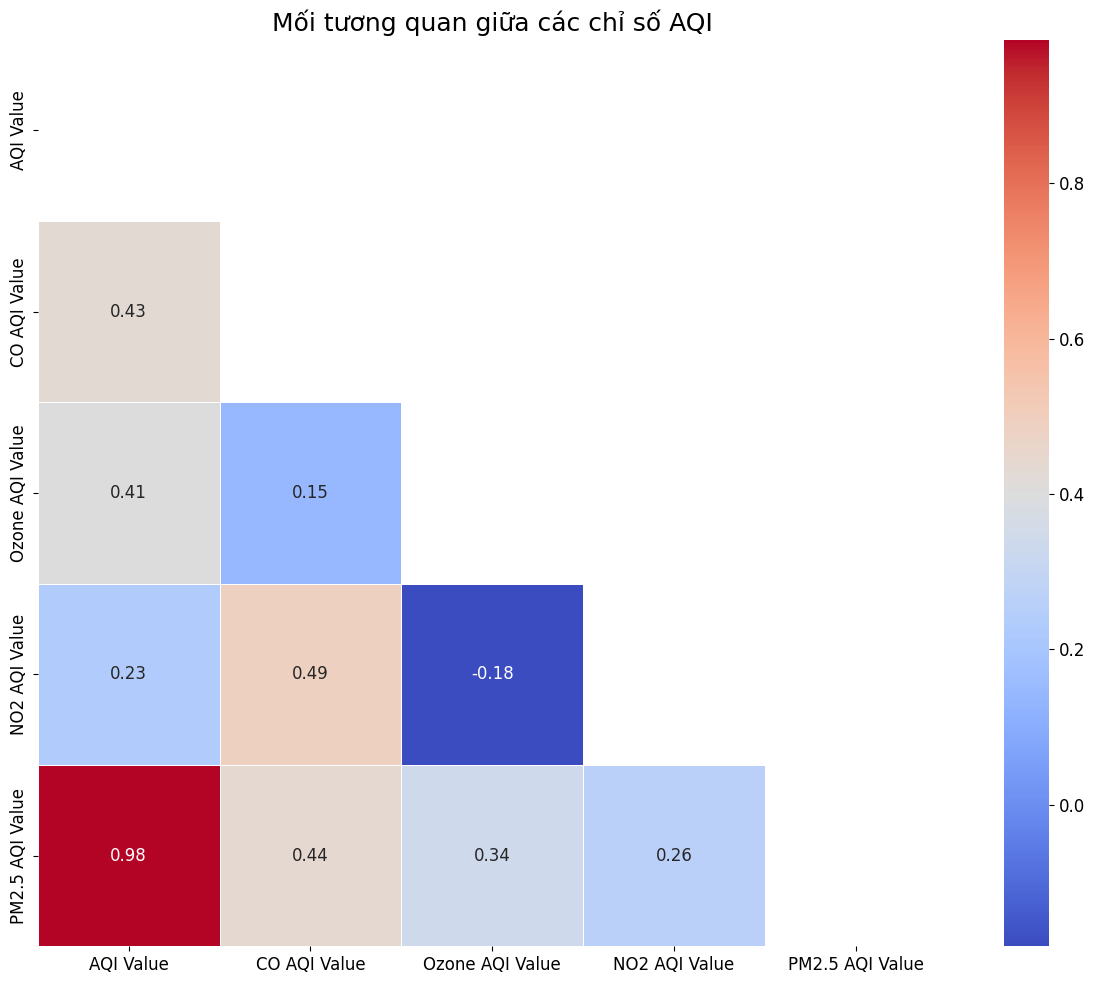

In [24]:
# 1. Map visualization - Phân bố ô nhiễm không khí trên toàn cầu
import plotly.express as px

# Tính trung bình chỉ số AQI theo quốc gia
country_avg_aqi = df_clean.groupby('Country')['AQI Value'].mean().reset_index()

# Vẽ bản đồ thế giới với mức độ ô nhiễm
fig = px.choropleth(country_avg_aqi, 
                    locations='Country', 
                    locationmode='country names',
                    color='AQI Value',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Phân bố chỉ số AQI trung bình trên toàn cầu')

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

# 2. Treemap visualization - Phân cấp ô nhiễm theo khu vực/quốc gia
# Tạo dataframe với phân cấp: Châu lục > Quốc gia
treemap_df = df_with_continent.groupby(['Continent', 'Country'])['AQI Value'].mean().reset_index()

fig = px.treemap(treemap_df, 
                path=[px.Constant("World"), 'Continent', 'Country'], 
                values='AQI Value',
                color='AQI Value',
                color_continuous_scale='RdBu_r',
                title='Phân cấp chỉ số AQI theo châu lục và quốc gia')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

# 3. Bubble chart - So sánh các chỉ số ô nhiễm
bubble_df = df_with_continent.groupby('Country').agg({
    'AQI Value': 'mean',
    'PM2.5 AQI Value': 'mean',
    'Ozone AQI Value': 'mean',
    'CO AQI Value': 'mean'
}).reset_index()

bubble_df = bubble_df.merge(df_with_continent[['Country', 'Continent']].drop_duplicates(), on='Country', how='left')

fig = px.scatter(bubble_df,
                x='PM2.5 AQI Value',
                y='Ozone AQI Value',
                size='AQI Value',
                color='Continent',
                hover_name='Country',
                size_max=50,
                title='So sánh chỉ số PM2.5 và Ozone theo quốc gia')

fig.update_layout(
    xaxis_title='PM2.5 AQI Value',
    yaxis_title='Ozone AQI Value'
)

fig.show()

# 4. Heatmap visualization - Mối tương quan giữa các chỉ số AQI
plt.figure(figsize=(12, 10))
correlation = df_clean[numeric_features].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Mối tương quan giữa các chỉ số AQI')
plt.tight_layout()
plt.show()

# 5. Parallel Coordinates Plot - So sánh đa chiều các chỉ số AQI
# Chọn 100 mẫu ngẫu nhiên để tránh biểu đồ quá phức tạp
sample_df = df_with_continent.sample(100, random_state=42)

# Tạo một cột số cho màu sắc dựa trên AQI Value thay vì dùng AQI Category
fig = px.parallel_coordinates(
    sample_df, 
    color='AQI Value',  # Thay 'AQI Category' bằng 'AQI Value'
    dimensions=['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'],
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='So sánh đa chiều các chỉ số AQI'
)

fig.show()

## 2.5 Thực hiện khai thác dữ liệu
### 2.5.1 Sử dụng phương pháp khai phá dữ liệu

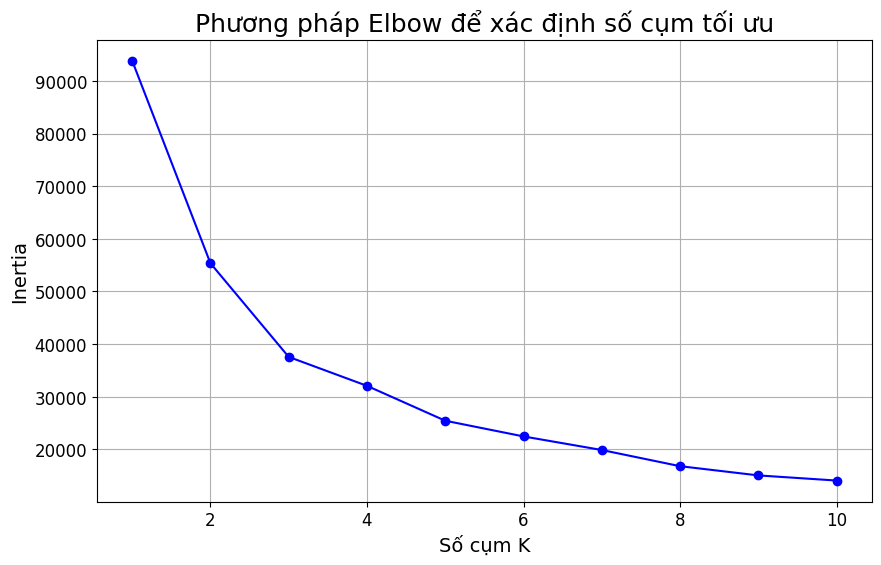

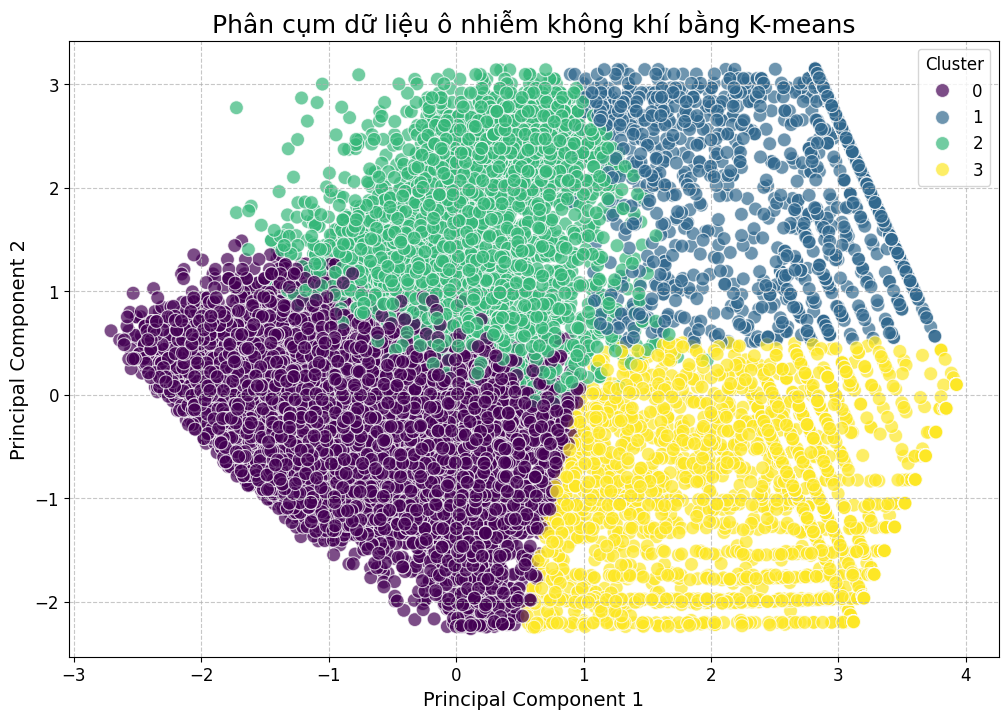

Đặc điểm trung bình của từng cụm:


AQI Value  PM2.5 AQI Value  Ozone AQI Value  CO AQI Value  \
Cluster                                                               
0         46.733298        42.925484        31.320981      0.871273   
1        145.581625       145.534982        15.612721      4.744170   
2         61.757733        61.722967        20.435806      1.510539   
3        161.460541       154.290323        75.346486      1.979551   

         NO2 AQI Value  
Cluster                 
0             1.021510  
1            14.597880  
2             8.279496  
3             1.650346

Độ chính xác trên tập kiểm tra: 0.9988634749254155

Báo cáo phân lớp:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2994
                     Hazardous       0.98      0.92      0.95        59
                      Moderate       1.00      1.00      1.00      2773
                     Unhealthy       1.00      1.00      1.00       638
Unhealthy for Sensitive Groups       1.00      1.00      1.00       494
                Very Unhealthy       0.94      0.98      0.96        81

                      accuracy                           1.00      7039
                     macro avg       0.99      0.98      0.98      7039
                  weighted avg       1.00      1.00      1.00      7039



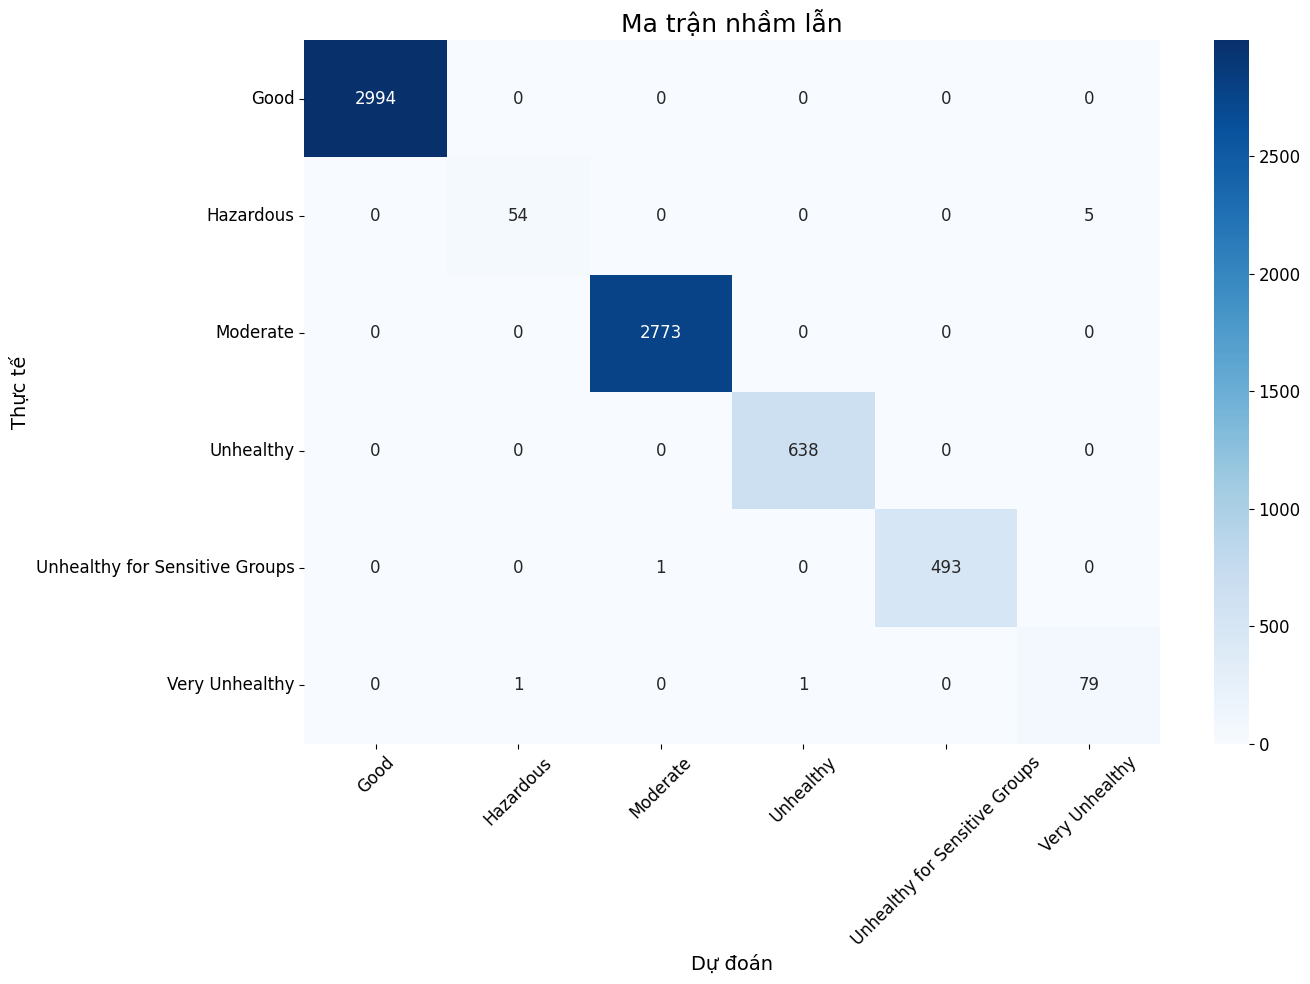

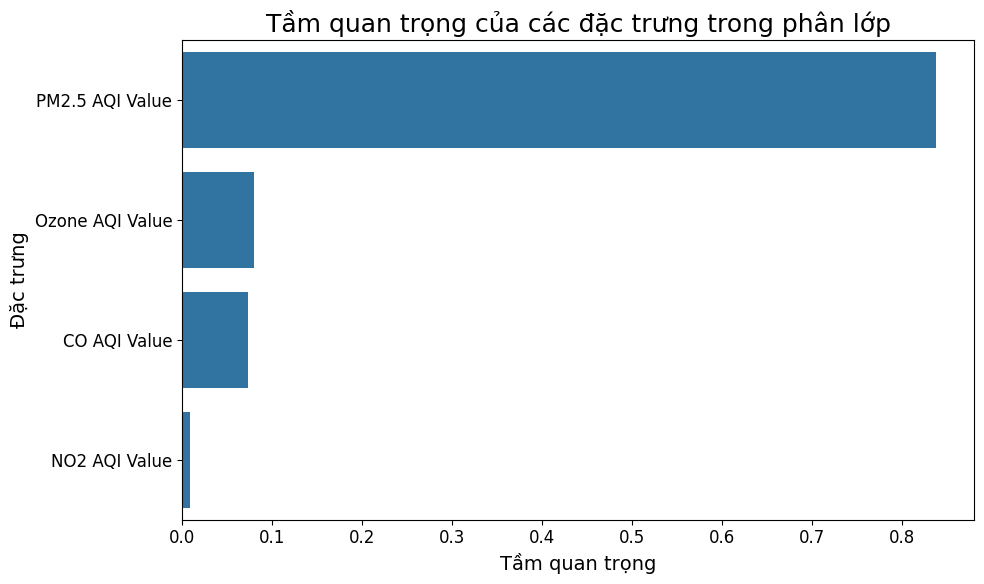

In [25]:
# 1. Phân cụm (Clustering) - K-means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Chọn các thuộc tính cho phân cụm
cluster_features = ['AQI Value', 'PM2.5 AQI Value', 'Ozone AQI Value', 'CO AQI Value', 'NO2 AQI Value']
X = df_standardized[cluster_features]

# Xác định số cụm tối ưu bằng phương pháp Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Số cụm K')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.grid(True)
plt.show()

# Phân cụm với K tối ưu (giả sử là 4 dựa trên biểu đồ Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
df_standardized['Cluster'] = kmeans.fit_predict(X)

# Giảm chiều dữ liệu để hiển thị kết quả phân cụm
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_standardized['Cluster']

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Phân cụm dữ liệu ô nhiễm không khí bằng K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Phân tích đặc điểm của từng cụm
cluster_analysis = df_clean.copy()
cluster_analysis['Cluster'] = df_standardized['Cluster']
cluster_stats = cluster_analysis.groupby('Cluster')[cluster_features].mean()

print("Đặc điểm trung bình của từng cụm:")
display(cluster_stats)

# Vẽ biểu đồ radar để so sánh đặc điểm của các cụm
fig = go.Figure()

for i in range(len(cluster_stats)):
    fig.add_trace(go.Scatterpolar(
        r=cluster_stats.iloc[i].values.tolist(),
        theta=cluster_features,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )
    ),
    showlegend=True,
    title='So sánh đặc điểm của các cụm'
)

fig.show()

# 2. Phân lớp (Classification) - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Chuẩn bị dữ liệu cho bài toán phân lớp mức độ chất lượng không khí
# Lấy các thuộc tính là các chỉ số đo lường và mục tiêu là AQI Category
X_class = df_clean[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y_class = df_clean['AQI Category']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Huấn luyện mô hình Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_classifier.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác trên tập kiểm tra:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân lớp:")
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(14, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Đánh giá tầm quan trọng của các đặc trưng
feature_importance = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Tầm quan trọng của các đặc trưng trong phân lớp')
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()

## 2.5.2 Đánh giá các mẫu thu được


Điểm Silhouette trung bình: 0.405


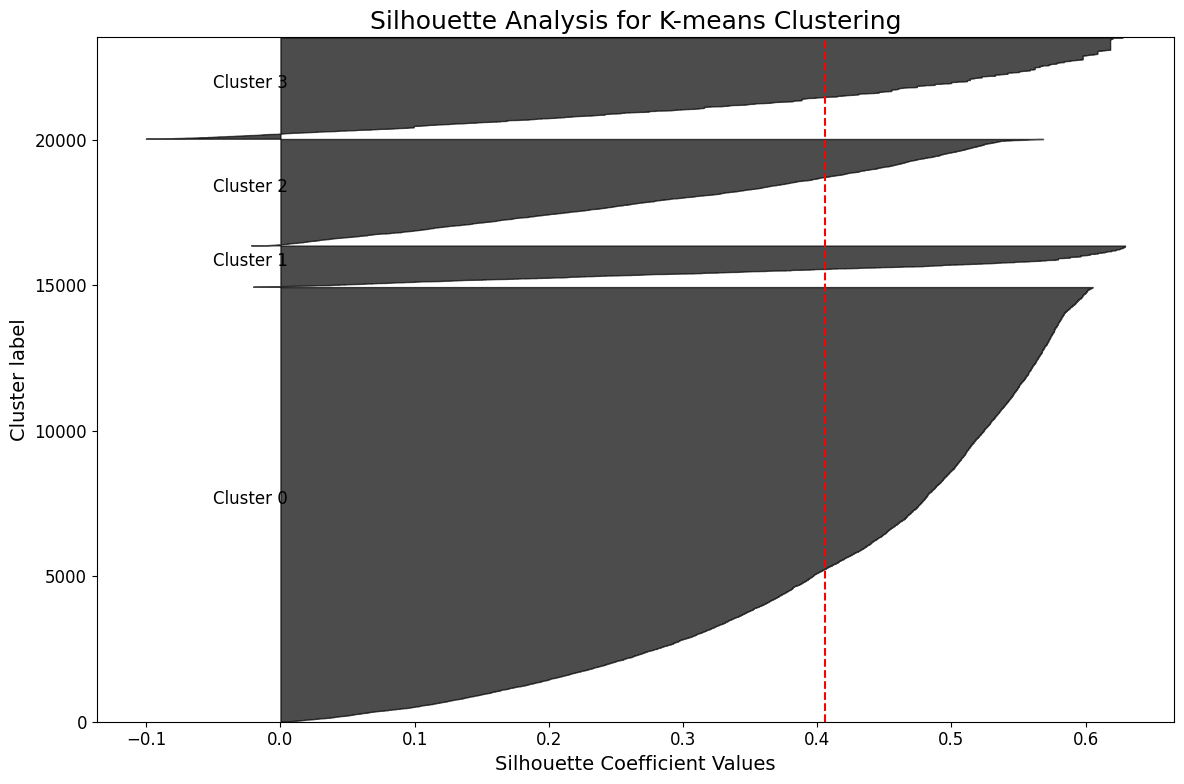

Độ chính xác cross-validation: 0.999 (+/- 0.001)


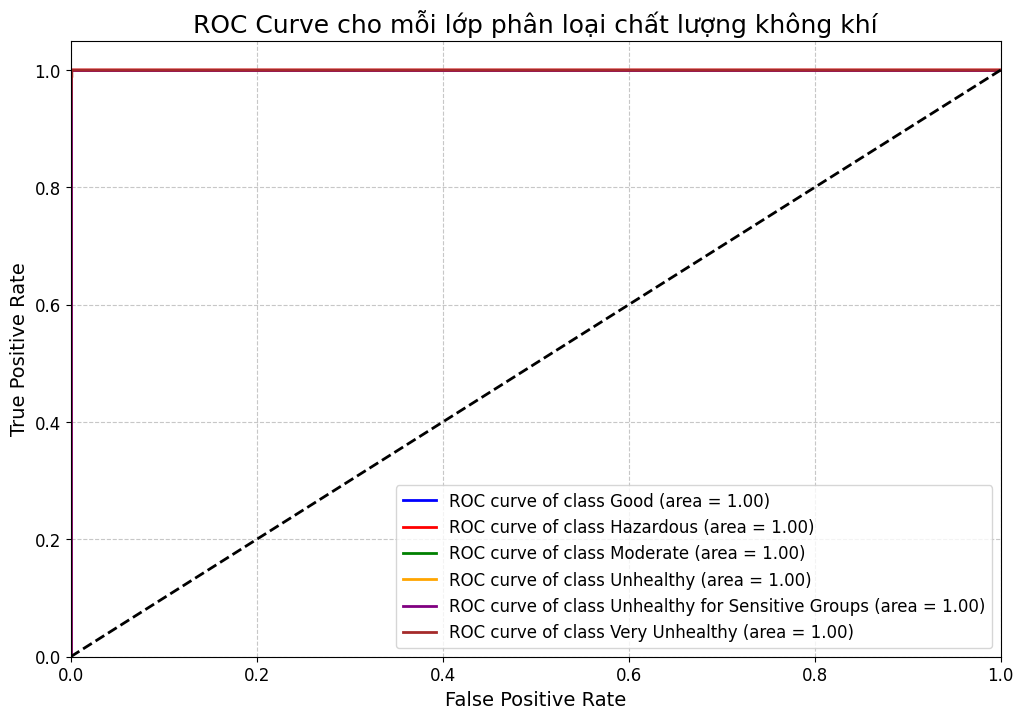

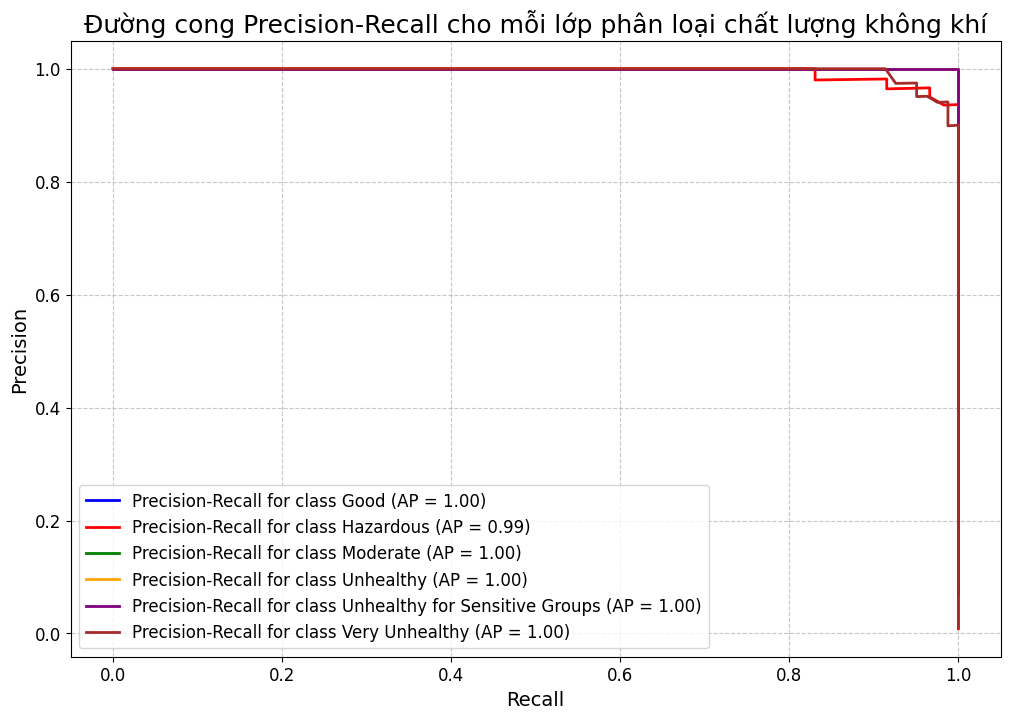

In [26]:
# 1. Đánh giá mô hình phân cụm

# Đánh giá sử dụng Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Tính điểm Silhouette cho mỗi điểm dữ liệu
silhouette_avg = silhouette_score(X, df_standardized['Cluster'])
sample_silhouette_values = silhouette_samples(X, df_standardized['Cluster'])

print(f"Điểm Silhouette trung bình: {silhouette_avg:.3f}")

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(12, 8))
colors = cm.nipy_spectral(df_standardized['Cluster'].astype(float) / 4)

y_lower = 10
for i in range(4):  # 4 cụm đã phân
    # Lấy các giá trị Silhouette của điểm dữ liệu thuộc cụm i
    ith_cluster_silhouette_values = sample_silhouette_values[df_standardized['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Analysis for K-means Clustering")
plt.ylim(0, len(X) + (4 + 1) * 10)
plt.tight_layout()
plt.show()

# 2. Đánh giá mô hình phân lớp

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_class, y_class, cv=5)
print(f"Độ chính xác cross-validation: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# ROC Curve và AUC cho mỗi lớp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Chuyển đổi nhãn thành dạng nhị phân
classes = rf_classifier.classes_
y_bin = label_binarize(y_test, classes=classes)
n_classes = y_bin.shape[1]

# Tính toán điểm dự đoán cho mỗi lớp
y_score = rf_classifier.predict_proba(X_test)

# Vẽ ROC Curve cho mỗi lớp
plt.figure(figsize=(12, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve cho mỗi lớp phân loại chất lượng không khí')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Vẽ đường cong Precision-Recall
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])

plt.figure(figsize=(12, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall for class {classes[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Đường cong Precision-Recall cho mỗi lớp phân loại chất lượng không khí')
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Kết luận và phân tích tổng hợp


=== KẾT LUẬN VÀ PHÂN TÍCH TỔNG HỢP ===

1. Phân bố chất lượng không khí trên toàn cầu:
  - Good: 42.35%
  - Moderate: 39.34%
  - Unhealthy: 9.49%
  - Unhealthy for Sensitive Groups: 6.78%
  - Very Unhealthy: 1.22%
  - Hazardous: 0.81%

2. Top 10 quốc gia có chỉ số AQI trung bình cao nhất:
  - Republic of Korea: 421.00
  - Bahrain: 188.00
  - Mauritania: 179.00
  - Pakistan: 178.79
  - United Arab Emirates: 163.67
  - Aruba: 163.00
  - Kuwait: 162.00
  - Qatar: 157.50
  - India: 152.96
  - Senegal: 152.42

3. Mối quan hệ giữa các chất ô nhiễm:
  - AQI Value và PM2.5 AQI Value: Tương quan thuận mạnh (r = 0.98)

4. Kết quả phân cụm:
  - Cụm 0:
    • AQI Value: 46.73
    • PM2.5 AQI Value: 42.93
    • Ozone AQI Value: 31.32
    • CO AQI Value: 0.87
    • NO2 AQI Value: 1.02

  - Cụm 1:
    • AQI Value: 145.58
    • PM2.5 AQI Value: 145.53
    • Ozone AQI Value: 15.61
    • CO AQI Value: 4.74
    • NO2 AQI Value: 14.60

  - Cụm 2:
    • AQI Value: 61.76
    • PM2.5 AQI Value: 61.72
    • Oz

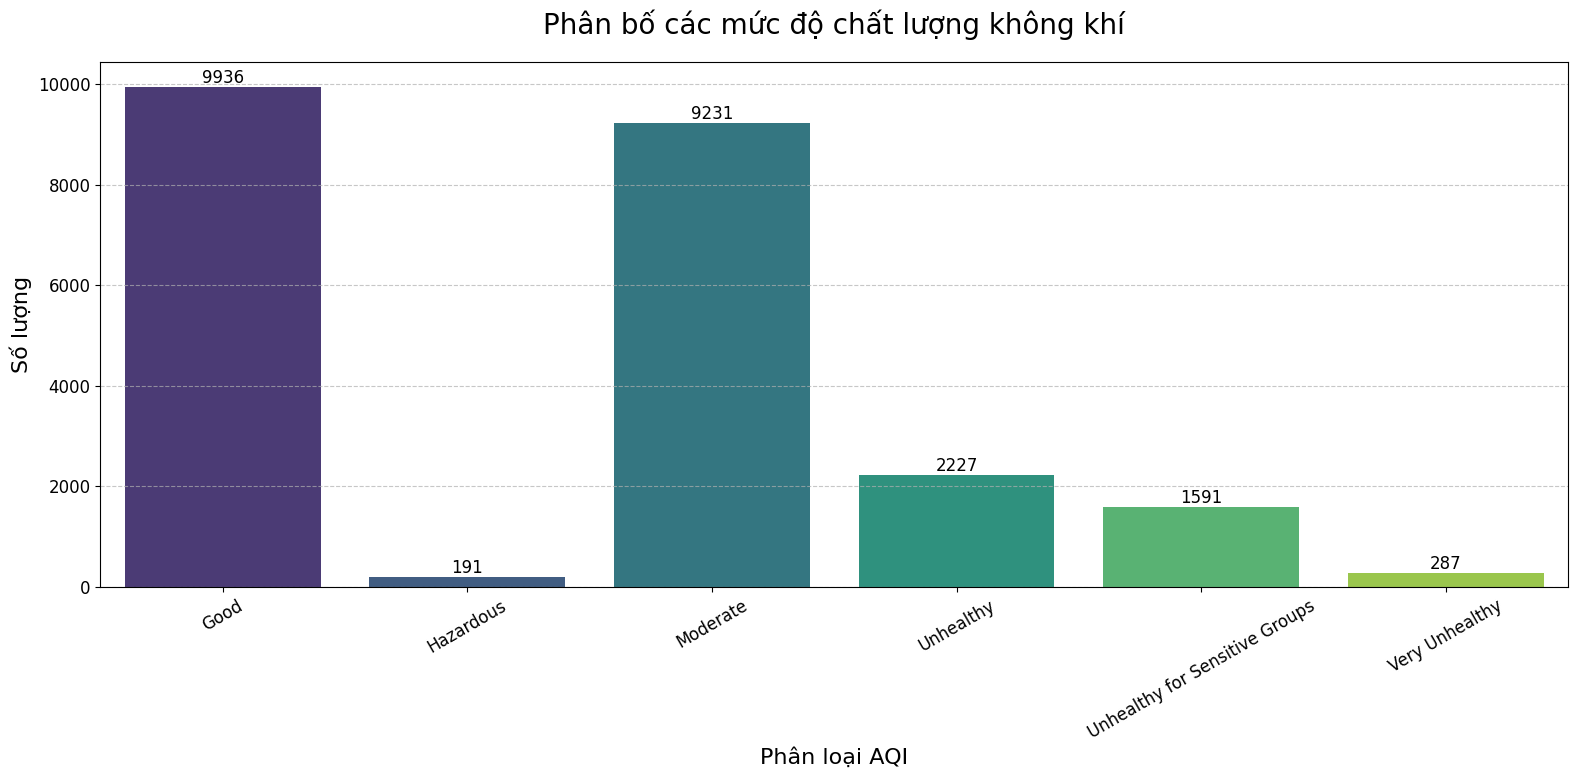

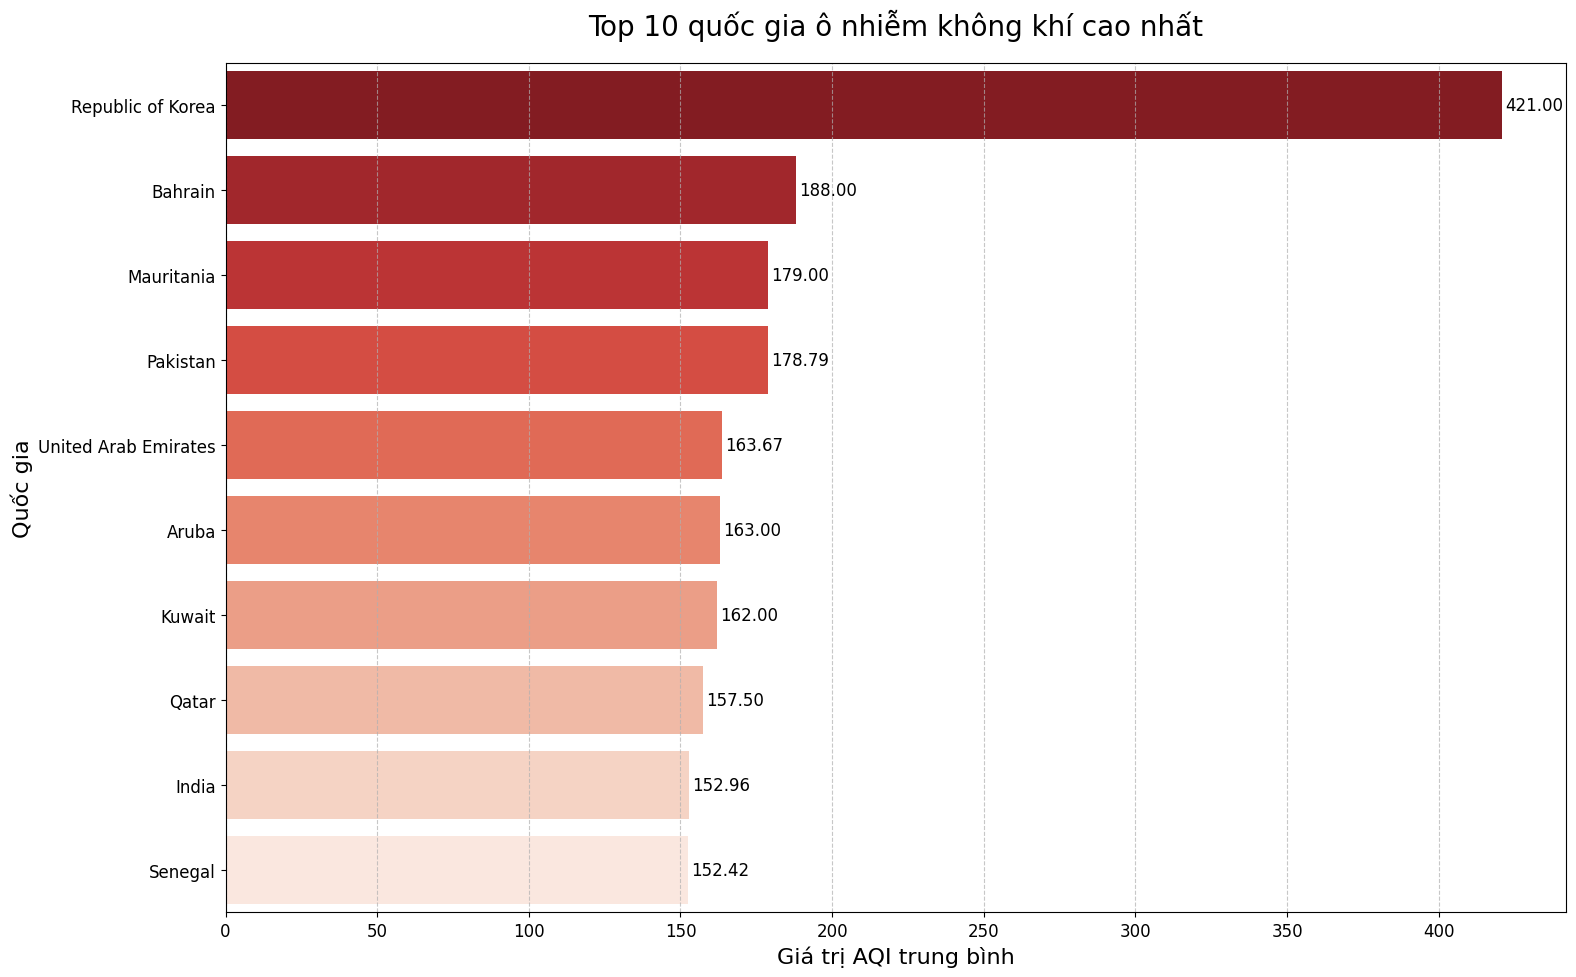

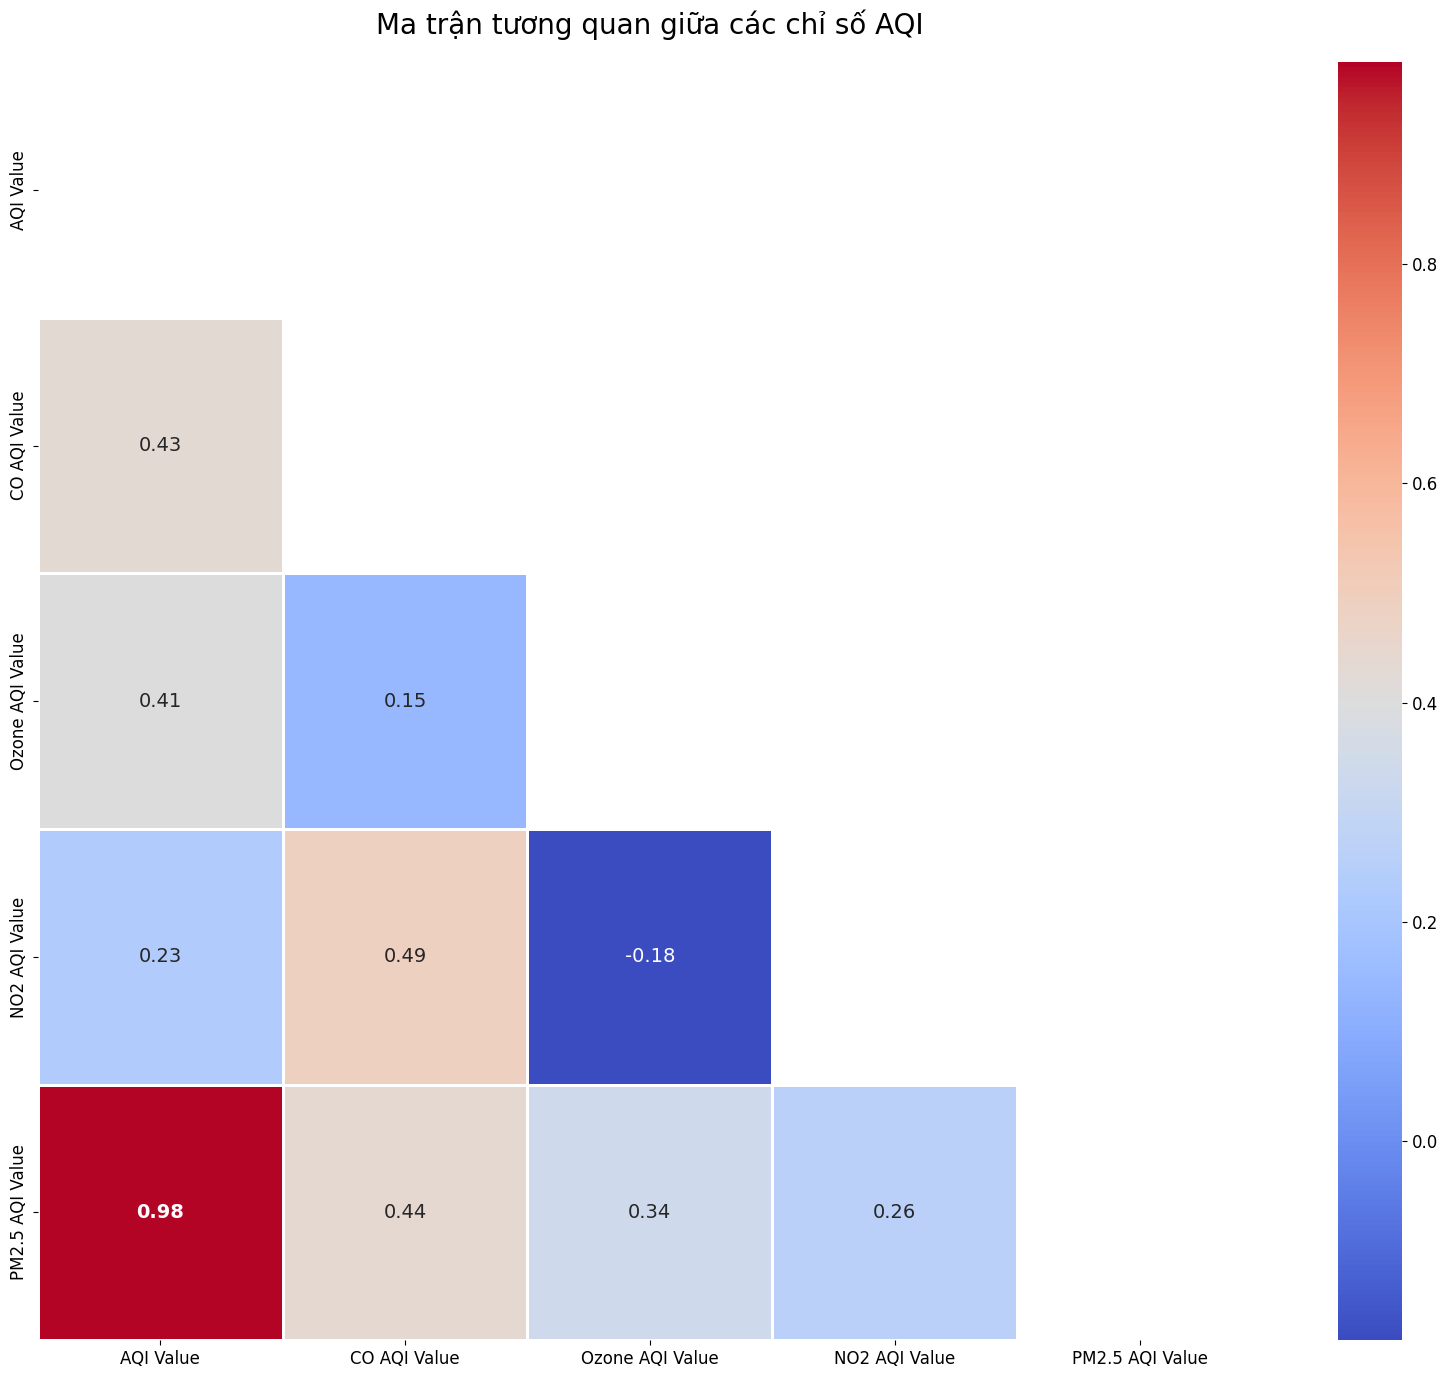

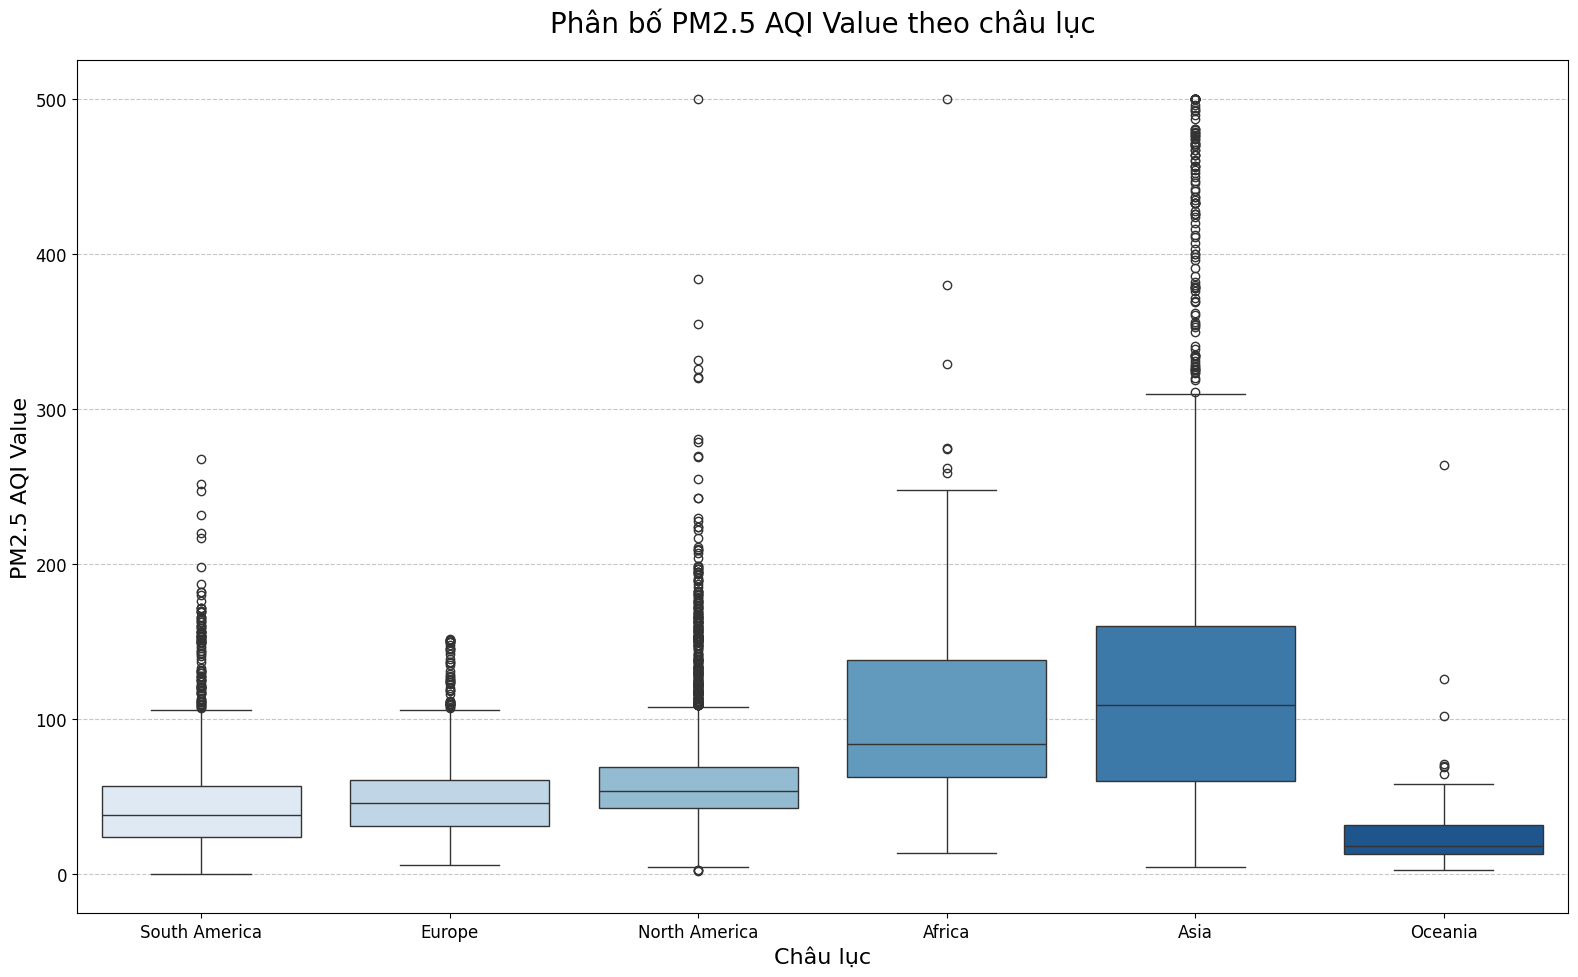

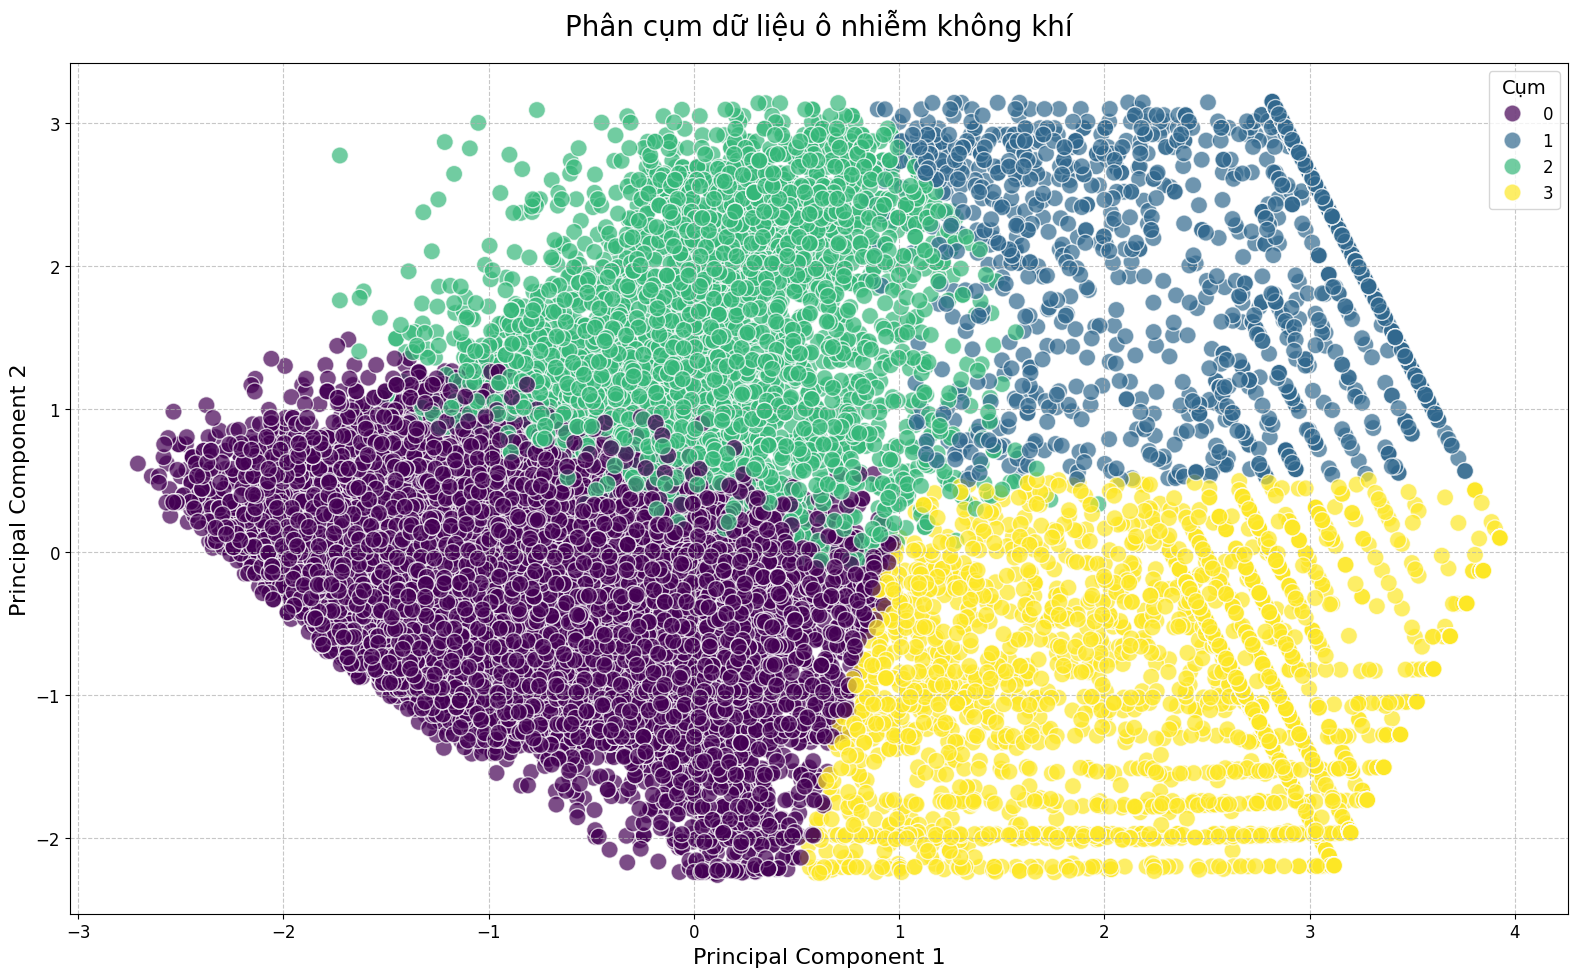

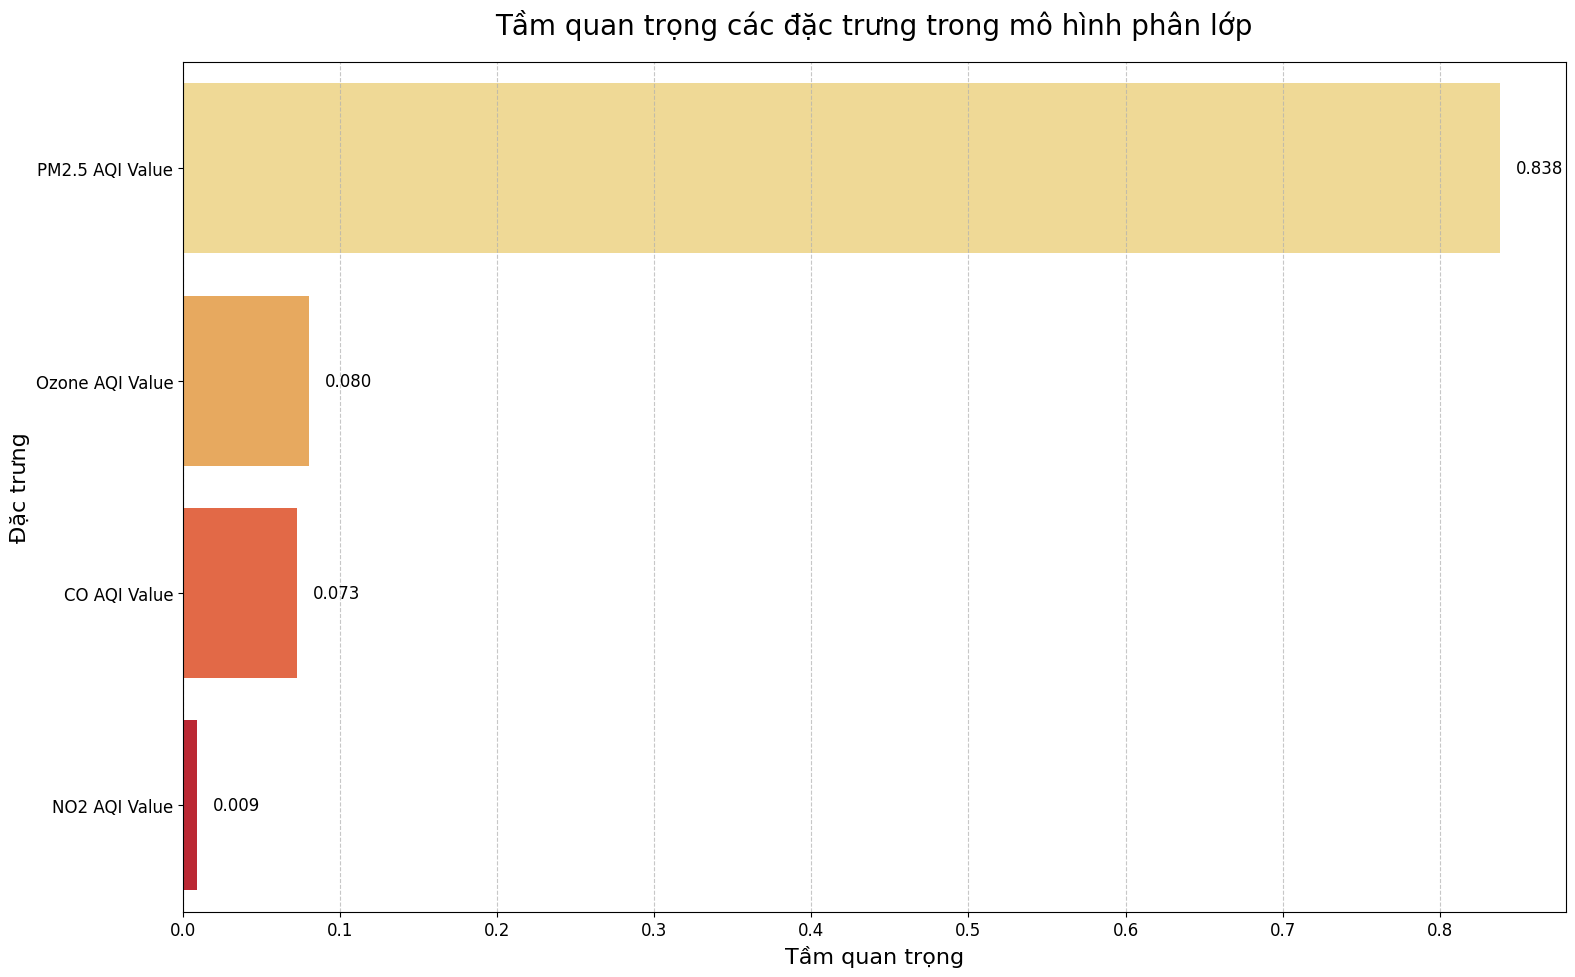

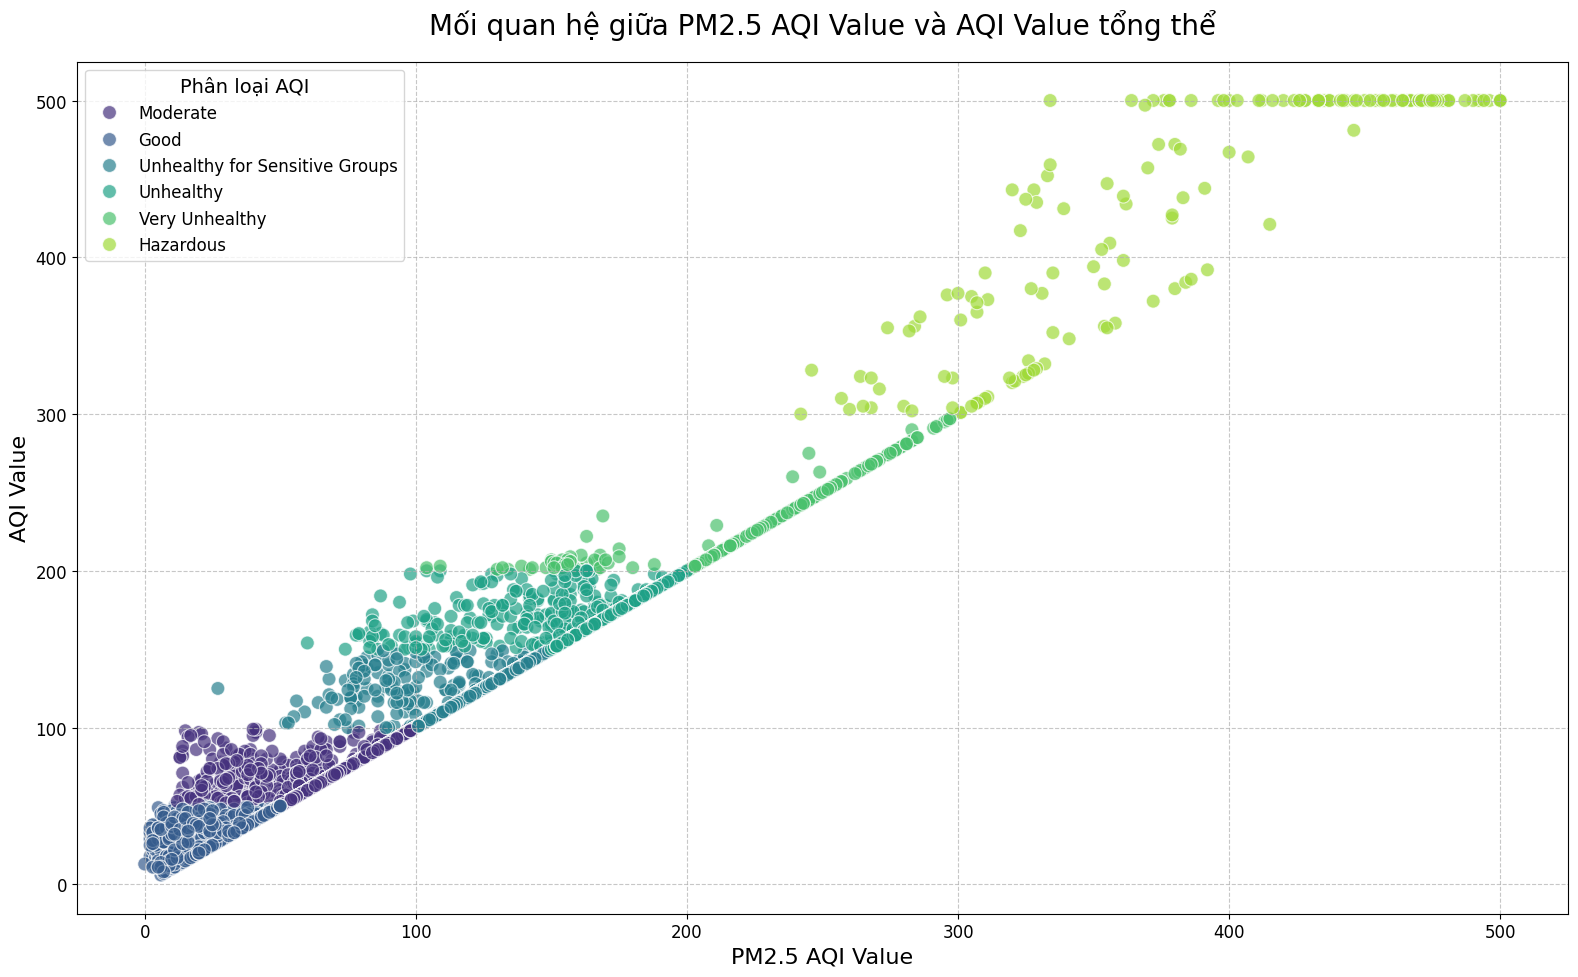

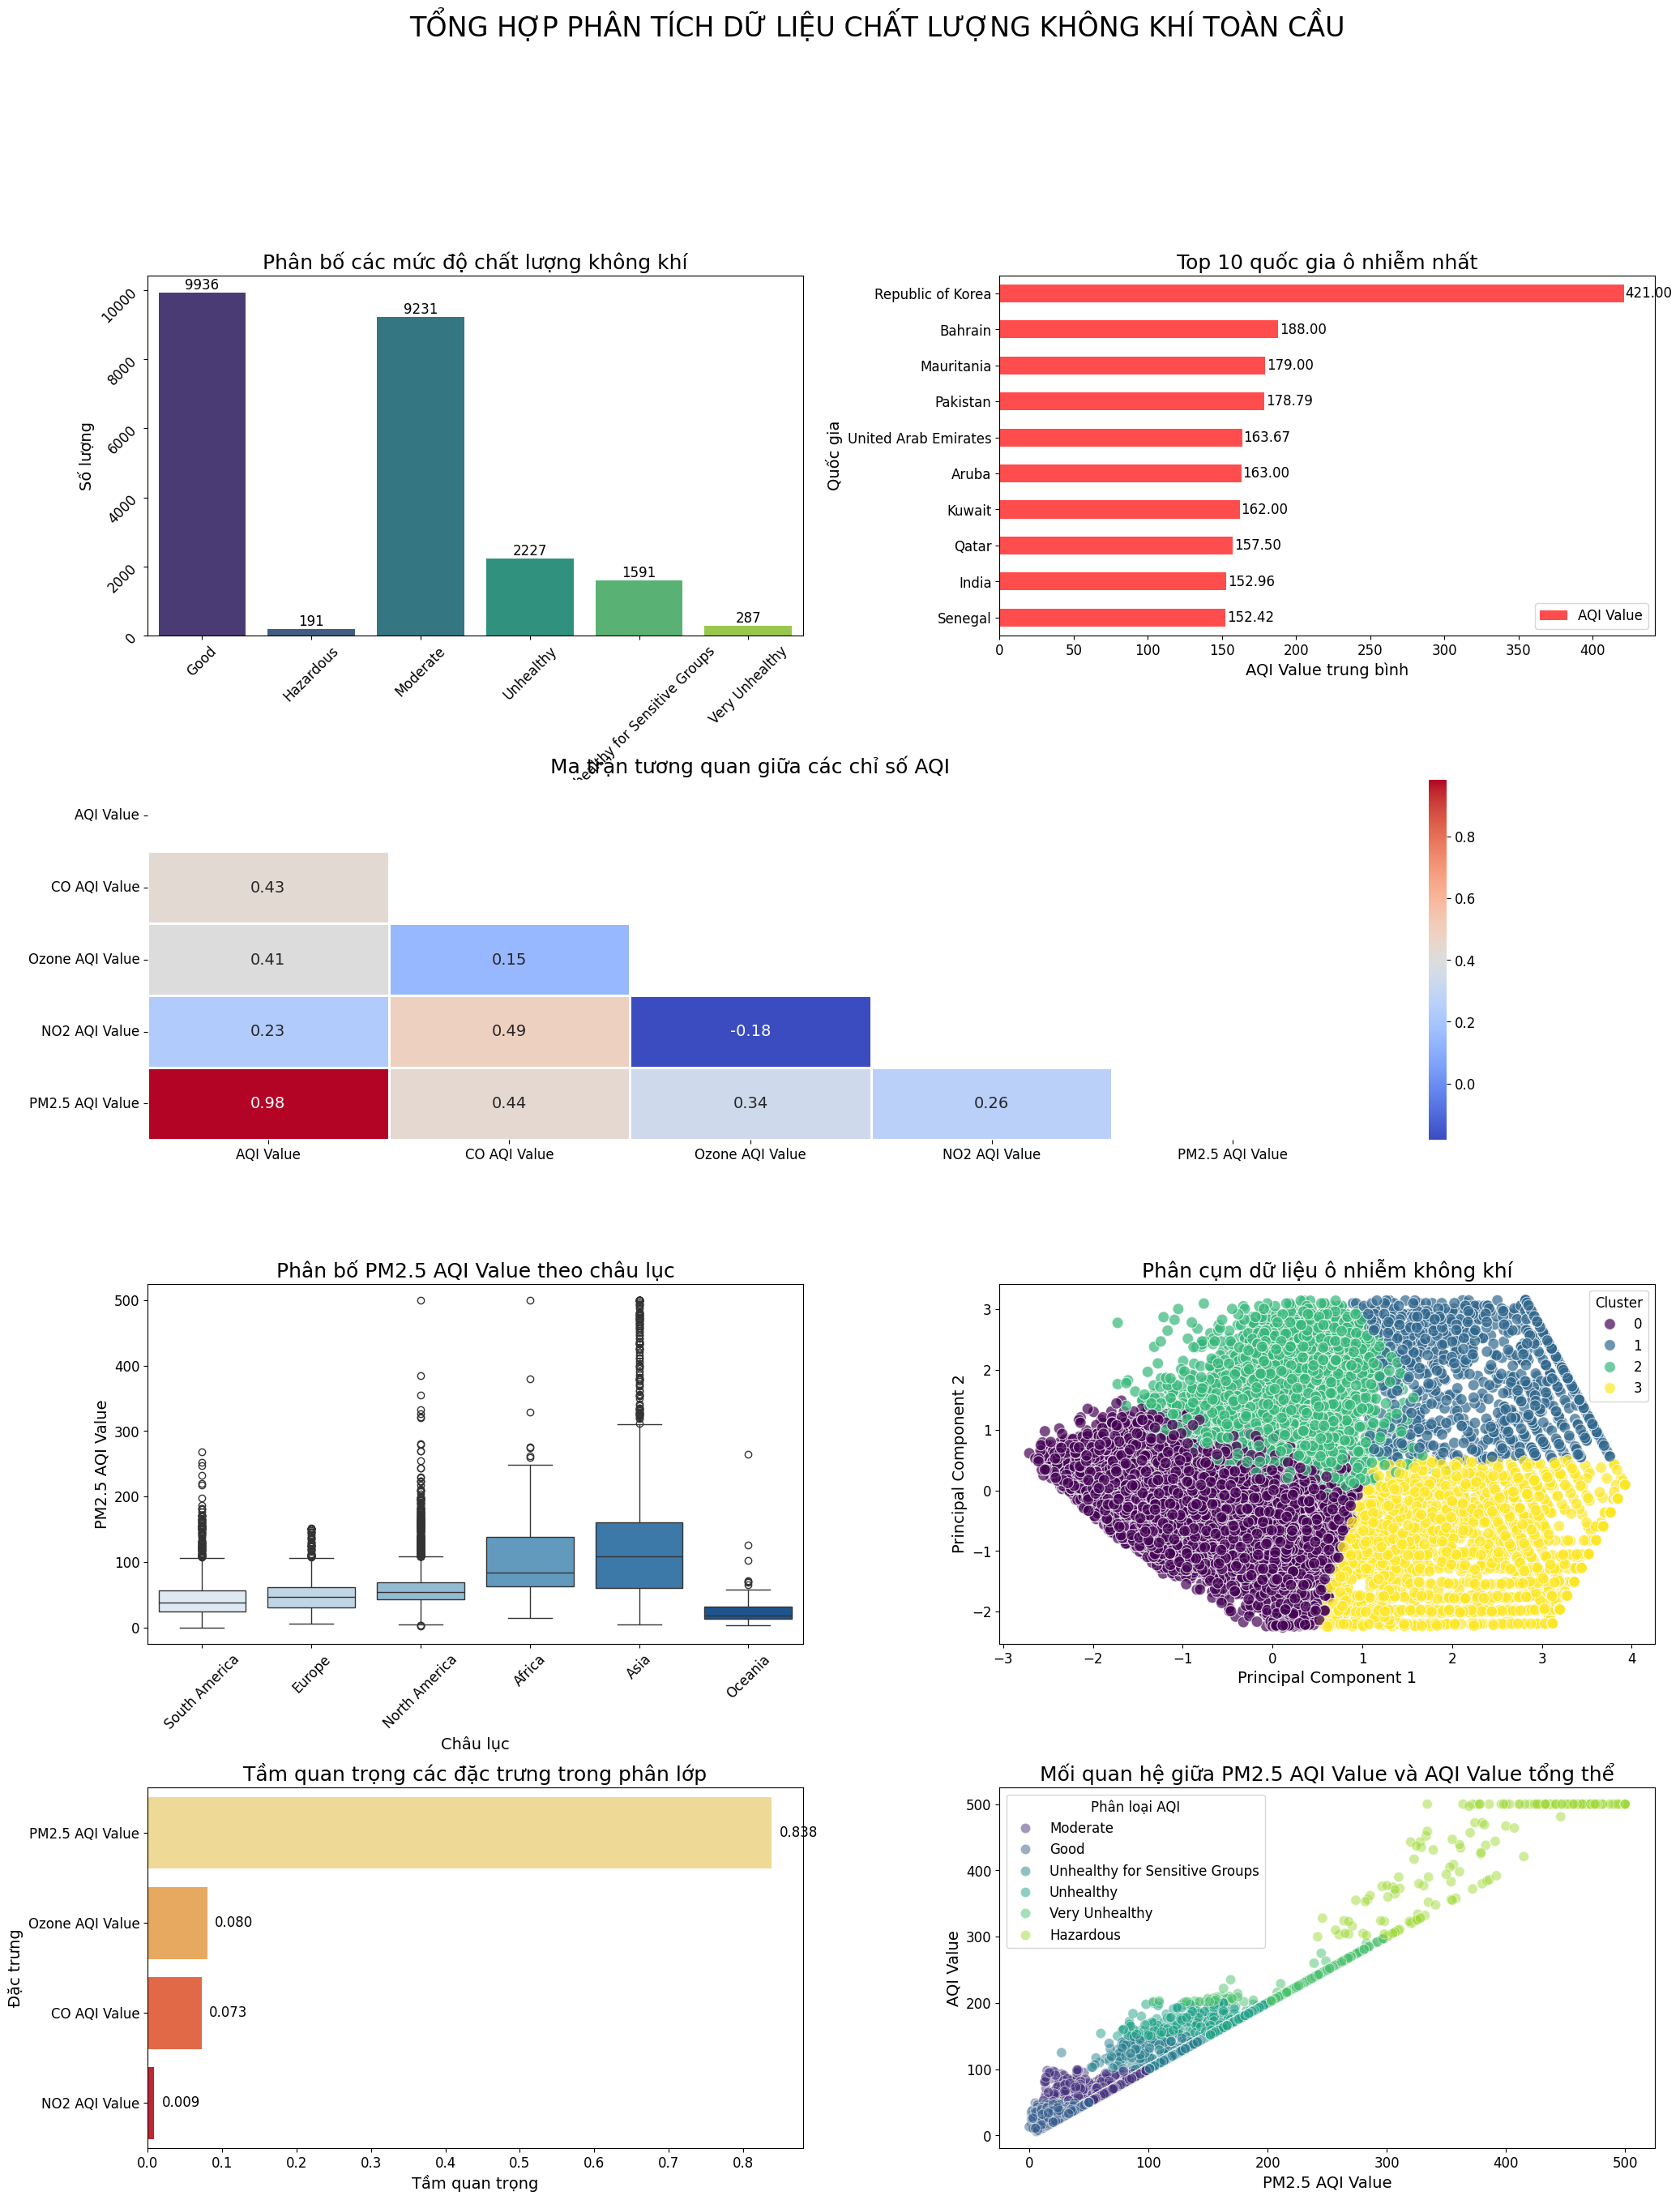


Đã lưu biểu đồ tổng kết vào file 'air_pollution_summary_improved.png'
Đã xuất báo cáo phân tích vào file 'air_pollution_analysis_report.md'


In [27]:
# Tạo báo cáo tổng hợp và phân tích về dữ liệu chất lượng không khí toàn cầu

# Cải thiện kích thước và chất lượng đồ thị
plt.rcParams['figure.figsize'] = (16, 10)  # Tăng kích thước đồ thị mặc định
plt.rcParams['font.size'] = 14  # Tăng kích thước font
plt.rcParams['axes.titlesize'] = 18  # Tăng kích thước tiêu đề
plt.rcParams['axes.labelsize'] = 14  # Tăng kích thước nhãn trục
plt.rcParams['xtick.labelsize'] = 12  # Tăng kích thước nhãn trục x
plt.rcParams['ytick.labelsize'] = 12  # Tăng kích thước nhãn trục y
plt.rcParams['legend.fontsize'] = 12  # Tăng kích thước chú thích
plt.rcParams['figure.titlesize'] = 20  # Tăng kích thước tiêu đề hình

# 1. Tổng kết các mẫu đã tìm thấy
print("=== KẾT LUẬN VÀ PHÂN TÍCH TỔNG HỢP ===")
print("\n1. Phân bố chất lượng không khí trên toàn cầu:")
aqi_category_counts = df_clean['AQI Category'].value_counts(normalize=True).to_dict()
for category, percentage in aqi_category_counts.items():
    print(f"  - {category}: {percentage*100:.2f}%")

# 2. Xếp hạng quốc gia theo mức độ ô nhiễm
top_countries = df_clean.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)
print("\n2. Top 10 quốc gia có chỉ số AQI trung bình cao nhất:")
for country, aqi in top_countries.items():
    print(f"  - {country}: {aqi:.2f}")

# 3. Mối quan hệ giữa các chất ô nhiễm
print("\n3. Mối quan hệ giữa các chất ô nhiễm:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.5:  # Chỉ hiển thị mối tương quan đáng kể
            strength = "mạnh" if abs(corr) > 0.7 else "trung bình"
            direction = "thuận" if corr > 0 else "nghịch"
            print(f"  - {col1} và {col2}: Tương quan {direction} {strength} (r = {corr:.2f})")

# 4. Kết quả phân cụm
print("\n4. Kết quả phân cụm:")
for i in range(len(cluster_stats)):
    print(f"  - Cụm {i}:")
    for feature in cluster_features:
        print(f"    • {feature}: {cluster_stats.loc[i, feature]:.2f}")
    print()

# 5. Kết quả phân lớp
print("\n5. Kết quả phân lớp:")
print(f"  - Độ chính xác của mô hình Random Forest: {accuracy_score(y_test, y_pred):.2f}")
print(f"  - Đặc trưng quan trọng nhất: {feature_importance.iloc[0]['Feature']} (tầm quan trọng: {feature_importance.iloc[0]['Importance']:.2f})")

# 6. Biểu đồ riêng lẻ được tối ưu hóa
# Phân bố AQI Category - Đồ thị cột với màu sắc tốt hơn
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AQI Category', data=df_clean, 
                  order=sorted(df_clean['AQI Category'].unique()),
                  palette='viridis')
plt.title('Phân bố các mức độ chất lượng không khí', fontsize=20, pad=20)
plt.xlabel('Phân loại AQI', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.xticks(rotation=30)

# Thêm giá trị số lượng trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('aqi_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 10 quốc gia ô nhiễm nhất - Đồ thị thanh ngang cải tiến
plt.figure(figsize=(16, 10))
bars = sns.barplot(x='AQI Value', y='Country', data=top_10_polluted.sort_values('AQI Value', ascending=False),
                  palette='Reds_r')
plt.title('Top 10 quốc gia ô nhiễm không khí cao nhất', fontsize=20, pad=20)
plt.xlabel('Giá trị AQI trung bình', fontsize=16)
plt.ylabel('Quốc gia', fontsize=16)

# Thêm giá trị AQI trên mỗi thanh
for i, v in enumerate(top_10_polluted.sort_values('AQI Value', ascending=False)['AQI Value']):
    plt.text(v + 1, i, f'{v:.2f}', va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_countries_pollution.png', dpi=300, bbox_inches='tight')
plt.show()

# Ma trận tương quan - Cải tiến heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(correlation_matrix)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
                     cmap='coolwarm', linewidths=1, mask=mask,
                     annot_kws={"size": 14})
plt.title('Ma trận tương quan giữa các chỉ số AQI', fontsize=20, pad=20)
for t in heatmap.texts:
    if float(t.get_text()) > 0.7:
        t.set_weight('bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Phân bố PM2.5 theo châu lục - Boxplot cải tiến
plt.figure(figsize=(16, 10))
boxplot = sns.boxplot(x='Continent', y='PM2.5 AQI Value', 
                     data=df_with_continent.dropna(subset=['Continent']),
                     palette='Blues')
plt.title('Phân bố PM2.5 AQI Value theo châu lục', fontsize=20, pad=20)
plt.xlabel('Châu lục', fontsize=16)
plt.ylabel('PM2.5 AQI Value', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pm25_by_continent.png', dpi=300, bbox_inches='tight')
plt.show()

# Phân cụm dữ liệu - Scatter plot cải tiến
plt.figure(figsize=(16, 10))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, 
                         palette='viridis', s=150, alpha=0.7)
plt.title('Phân cụm dữ liệu ô nhiễm không khí', fontsize=20, pad=20)
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.legend(title='Cụm', title_fontsize=14, fontsize=12, loc='best')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('clustering_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Tầm quan trọng các đặc trưng - Barplot cải tiến
plt.figure(figsize=(16, 10))
importance = sns.barplot(x='Importance', y='Feature', data=feature_importance,
                        palette='YlOrRd')
plt.title('Tầm quan trọng các đặc trưng trong mô hình phân lớp', fontsize=20, pad=20)
plt.xlabel('Tầm quan trọng', fontsize=16)
plt.ylabel('Đặc trưng', fontsize=16)

# Thêm giá trị trên mỗi thanh
for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Mối quan hệ giữa PM2.5 và AQI Value - Scatter plot cải tiến
plt.figure(figsize=(16, 10))
scatter = sns.scatterplot(x='PM2.5 AQI Value', y='AQI Value', 
                         data=df_clean, alpha=0.7, hue='AQI Category',
                         palette='viridis', s=100)
plt.title('Mối quan hệ giữa PM2.5 AQI Value và AQI Value tổng thể', fontsize=20, pad=20)
plt.xlabel('PM2.5 AQI Value', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.legend(title='Phân loại AQI', title_fontsize=14, fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pm25_aqi_relationship.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Tạo dashboard tổng hợp với kích thước lớn hơn
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(24, 30))
gs = GridSpec(4, 2, figure=plt.gcf(), wspace=0.3, hspace=0.4)

# Biểu đồ 1: Phân bố AQI Category
ax1 = plt.subplot(gs[0, 0])
sns.countplot(x='AQI Category', data=df_clean, 
             order=sorted(df_clean['AQI Category'].unique()),
             palette='viridis', ax=ax1)
ax1.set_title('Phân bố các mức độ chất lượng không khí', fontsize=18)
ax1.set_xlabel('AQI Category', fontsize=14)
ax1.set_ylabel('Số lượng', fontsize=14)
ax1.tick_params(labelrotation=45)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Biểu đồ 2: Top 10 quốc gia ô nhiễm nhất
ax2 = plt.subplot(gs[0, 1])
top_10_polluted.sort_values('AQI Value', ascending=True).plot(
    kind='barh', x='Country', y='AQI Value', color='red', alpha=0.7, ax=ax2)
ax2.set_title('Top 10 quốc gia ô nhiễm nhất', fontsize=18)
ax2.set_xlabel('AQI Value trung bình', fontsize=14)
ax2.set_ylabel('Quốc gia', fontsize=14)
for i, v in enumerate(top_10_polluted.sort_values('AQI Value', ascending=True)['AQI Value']):
    ax2.text(v + 1, i, f'{v:.2f}', va='center', fontsize=12)

# Biểu đồ 3: Tương quan giữa các chỉ số
ax3 = plt.subplot(gs[1, :])
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
           cmap='coolwarm', linewidths=0.8, mask=mask, 
           annot_kws={"size": 14}, ax=ax3)
ax3.set_title('Ma trận tương quan giữa các chỉ số AQI', fontsize=18)

# Biểu đồ 4: Phân bố PM2.5 theo khu vực
ax4 = plt.subplot(gs[2, 0])
sns.boxplot(x='Continent', y='PM2.5 AQI Value', 
           data=df_with_continent.dropna(subset=['Continent']),
           palette='Blues', ax=ax4)
ax4.set_title('Phân bố PM2.5 AQI Value theo châu lục', fontsize=18)
ax4.set_xlabel('Châu lục', fontsize=14)
ax4.set_ylabel('PM2.5 AQI Value', fontsize=14)
ax4.tick_params(axis='x', labelrotation=45)

# Biểu đồ 5: Phân cụm dữ liệu
ax5 = plt.subplot(gs[2, 1])
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', 
               data=pca_df, palette='viridis', s=100, alpha=0.7, ax=ax5)
ax5.set_title('Phân cụm dữ liệu ô nhiễm không khí', fontsize=18)
ax5.set_xlabel('Principal Component 1', fontsize=14)
ax5.set_ylabel('Principal Component 2', fontsize=14)
ax5.legend(title='Cluster', title_fontsize=12)

# Biểu đồ 6: Tầm quan trọng các đặc trưng
ax6 = plt.subplot(gs[3, 0])
sns.barplot(x='Importance', y='Feature', data=feature_importance, 
           palette='YlOrRd', ax=ax6)
ax6.set_title('Tầm quan trọng các đặc trưng trong phân lớp', fontsize=18)
ax6.set_xlabel('Tầm quan trọng', fontsize=14)
ax6.set_ylabel('Đặc trưng', fontsize=14)
for i, v in enumerate(feature_importance['Importance']):
    ax6.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=12)

# Biểu đồ 7: Mối quan hệ giữa PM2.5 và AQI Value
ax7 = plt.subplot(gs[3, 1])
sns.scatterplot(x='PM2.5 AQI Value', y='AQI Value', 
               data=df_clean, alpha=0.5, hue='AQI Category',
               palette='viridis', s=80, ax=ax7)
ax7.set_title('Mối quan hệ giữa PM2.5 AQI Value và AQI Value tổng thể', fontsize=18)
ax7.set_xlabel('PM2.5 AQI Value', fontsize=14)
ax7.set_ylabel('AQI Value', fontsize=14)
ax7.legend(title='Phân loại AQI', title_fontsize=12)

plt.suptitle('TỔNG HỢP PHÂN TÍCH DỮ LIỆU CHẤT LƯỢNG KHÔNG KHÍ TOÀN CẦU', fontsize=24, y=0.99)
plt.tight_layout()
plt.savefig('air_pollution_summary_improved.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nĐã lưu biểu đồ tổng kết vào file 'air_pollution_summary_improved.png'")

# 8. Xuất báo cáo phân tích
report = f"""
# BÁO CÁO PHÂN TÍCH DỮ LIỆU CHẤT LƯỢNG KHÔNG KHÍ TOÀN CẦU

## 1. Tổng quan về dữ liệu
- **Kích thước dữ liệu**: {df_clean.shape[0]} bản ghi, {df_clean.shape[1]} thuộc tính
- **Nguồn dữ liệu**: Dữ liệu về chất lượng không khí từ các trạm quan trắc trên toàn cầu
- **Các thông số chính**: AQI tổng thể, CO, Ozone, NO2, PM2.5

## 2. Phân tích thăm dò dữ liệu
- **Phân bố chất lượng không khí**:
  {', '.join([f"{category}: {percentage*100:.2f}%" for category, percentage in aqi_category_counts.items()])}

- **Mối tương quan giữa các chỉ số ô nhiễm**:
  - Tương quan mạnh nhất: {correlation_matrix.unstack().sort_values(ascending=False).index[1][0]} và {correlation_matrix.unstack().sort_values(ascending=False).index[1][1]} (r = {correlation_matrix.unstack().sort_values(ascending=False).iloc[1]:.2f})

## 3. Phân tích không gian
- **Quốc gia có chỉ số AQI cao nhất**: {top_countries.index[0]} (AQI = {top_countries.iloc[0]:.2f})
- **Quốc gia có chỉ số AQI thấp nhất**: {df_clean.groupby('Country')['AQI Value'].mean().sort_values().index[0]} (AQI = {df_clean.groupby('Country')['AQI Value'].mean().sort_values().iloc[0]:.2f})
- **Châu lục có chỉ số AQI trung bình cao nhất**: {continent_aqi.sort_values('AQI Value', ascending=False)['Continent'].iloc[0]} (AQI = {continent_aqi.sort_values('AQI Value', ascending=False)['AQI Value'].iloc[0]:.2f})

## 4. Kết quả phân cụm
- **Số lượng cụm tối ưu**: 4 cụm (dựa trên phương pháp Elbow)
- **Silhouette Score**: {silhouette_avg:.3f}
- **Đặc điểm các cụm**:
{cluster_stats.to_string()}

## 5. Kết quả phân lớp (Dự đoán AQI Category)
- **Thuật toán**: Random Forest
- **Độ chính xác**: {accuracy_score(y_test, y_pred):.2f}
- **Đặc trưng quan trọng nhất**: {feature_importance.iloc[0]['Feature']} (tầm quan trọng: {feature_importance.iloc[0]['Importance']:.2f})

## 6. Kết luận và đề xuất
- **Tình hình ô nhiễm không khí toàn cầu**: Mức độ ô nhiễm không khí khác nhau đáng kể giữa các khu vực, với {top_countries.index[:3].tolist()} là những quốc gia có mức độ ô nhiễm cao nhất.
- **Nguồn ô nhiễm chính**: PM2.5 là chỉ số có mối tương quan mạnh nhất với AQI tổng thể, cho thấy bụi mịn là nguồn ô nhiễm đáng quan tâm nhất.
- **Đề xuất**:
  - Tăng cường giám sát chất lượng không khí tại các khu vực có mức độ ô nhiễm cao
  - Triển khai các biện pháp giảm phát thải PM2.5, đặc biệt là tại các quốc gia có chỉ số AQI cao
  - Tiếp tục thu thập dữ liệu theo thời gian để đánh giá xu hướng biến đổi chất lượng không khí
"""

# Lưu báo cáo vào file markdown
with open('air_pollution_analysis_report.md', 'w', encoding='utf-8') as f:
    f.write(report)

print("Đã xuất báo cáo phân tích vào file 'air_pollution_analysis_report.md'")